# PyTorch training loop and Testing loop

For the training loop, we'll build the following steps:

1. Forward pass
2. Calculate the loss
3. 	Zero gradients
4. Perform backpropagation on the loss
5. Update the optimizer (gradient descent)

In [1]:
import torch
import numpy as np
import seaborn as sns
from torch import nn

torch.manual_seed(42)

X = np.linspace(0,20,num=200)
y = X + np.sin(X)*2 + np.random.normal(size=X.shape)

<Axes: >

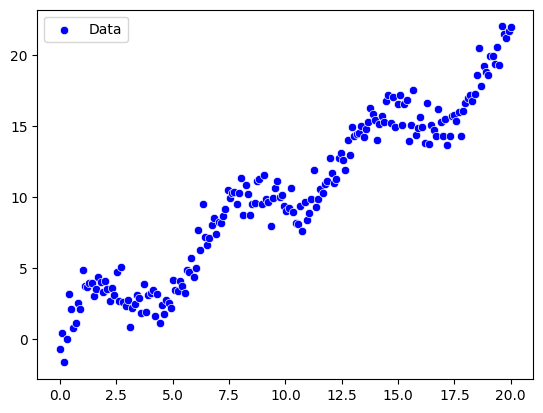

In [2]:
sns.scatterplot(x=X,y=y,color='Blue', label='Data')

In [3]:
from torch.utils.data import Dataset , DataLoader

class Simple1DRegressionDataset(Dataset):
    def __init__(self,X,y):
        super(Simple1DRegressionDataset,self).__init__()
        self.X = X.reshape(-1,1)
        self.y = y.reshape(-1,1)

    def __getitem__(self,index):
        return torch.tensor(self.X[index,:],dtype=torch.float32) , torch.tensor(self.y[index,:],dtype=torch.float32)

    def __len__(self):
        return self.X.shape[0]

In [4]:
df = Simple1DRegressionDataset(X,y)


In [5]:
df[0]


(tensor([0.]), tensor([-0.7102]))

In [6]:
training_loader = DataLoader(Simple1DRegressionDataset(X,y),shuffle=True)

In [7]:
data_point = next(iter(training_loader))
data_point


[tensor([[8.8442]]), tensor([[11.2538]])]

In [8]:
# construct the model using Linear block
in_features = 1
out_features = 1
#model_2 = nn.Linear(in_features,out_features)
model_2 = nn.Sequential(
    nn.Linear(in_features, 128),
    nn.ReLU(),
    nn.Linear(128, 64),
    nn.ReLU(),
    nn.Linear(64, 32),
    nn.ReLU(),
    nn.Linear(32, out_features)
)

In [9]:
loss_fn = nn.MSELoss()

In [10]:
optimizer = torch.optim.SGD(params=model_2.parameters(),lr=0.001)

In [11]:
# so we need now a training loop
from tqdm.autonotebook import tqdm

def train_simple_network(model,
                        loss_fn,
                        training_loader,
                        epochs=5,
                        device='cpu',
                        optimizer=optimizer):

    optimizer = torch.optim.SGD(params=model.parameters(),lr=0.001)

    model.to(device)

    for epoch in tqdm(range(epochs), desc="Epochs"):

        model = model.train()

        running_loss = 0

        for inputs , labels in tqdm(training_loader,desc='Batches'):

            inputs = inputs.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()

            y_pred = model(inputs)

            loss = loss_fn(y_pred, labels)

            loss.backward()

            optimizer.step()

            running_loss += loss.item()
            print(running_loss)



<ipython-input-11-f3caa4f47508>:2: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [12]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
device

'cpu'

In [17]:
train_simple_network(model_2,
                loss_fn,
                training_loader,
                device=device,
                epochs=100
                )


Epochs:   0%|          | 0/100 [00:00<?, ?it/s]

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

31.29730987548828
61.66423416137695
65.83186340332031
66.11240941286087
121.95167714357376
124.02300435304642
137.32274609804153
150.74867993593216
156.82303696870804
170.10403233766556
173.55570656061172
208.53587013483047
218.7022653222084
220.74689894914627
251.66054564714432
268.07163840532303
268.4806836247444
272.6518023610115
283.6824401021004
283.9171904474497
309.57162465155125
362.8512267023325
372.4286068826914
408.56659592688084
441.62087143957615
441.6576583571732
480.35886837914586
529.9227645583451
540.1102063842118
540.1104853627912
540.2763223377697
540.477099793934
593.5264963088266
593.5368455666758
593.7817203569866
597.5460476446606
598.7431345749355
599.0157174635387
599.6799044776417
627.0185370612598
650.8412184882618
650.8785628284968
651.1897438969172
693.5257157291926
693.9787543024577
697.6527798380412
705.3238437380351
725.5370261873759
725.8545978571929
766.5051219965972
767.3909650947608
809.0752073432959
820.7321048881568
830.4401298667945
830.5126495267

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.461714744567871
4.329090356826782
5.87800395488739
9.130655169487
11.990065217018127
15.363582730293274
23.78753674030304
36.57868015766144
42.29647696018219
42.40136731415987
52.43542016297579
52.66653072088957
57.42413388937712
75.94510137289762
87.48518430441618
91.34473096579313
94.82540284842253
97.72540103644133
102.59563886374235
104.48416768759489
105.06322722882032
118.20400481671095
133.3180442377925
133.49365531653166
145.33603297919035
145.807373277843
159.65421985834837
163.07905935496092
170.74190687388182
184.09319948405027
206.682306997478
206.68248216513894
218.8737301052024
218.98587591652176
219.1753573239257
219.1871365083789
229.27495846882812
233.80142817631713
234.5713717712497
236.2924136890506
237.34921310082427
237.50926219657413
238.21093939975253
242.52315997317783
253.03042315677158
253.05815718867234
253.5311544368451
257.3402584026044
275.6754520366376
280.02365951039246
280.16271464325837
296.58972804047517
296.6185648719256
297.56959047712735
301.7034

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.5768685340881348
4.5808751583099365
5.078505337238312
5.471149355173111
5.527503840625286
9.989258162677288
10.424659095704556
10.600446663796902
10.750667817890644
11.101521499454975
19.00148869305849
22.775451190769672
28.827093608677387
28.944210954010487
30.676149792969227
35.02041286975145
47.420566983520985
49.53049320727587
49.986448772251606
53.59167242795229
54.29202414304018
55.43739748746157
62.65874148160219
62.79667580872774
63.69624013453722
72.32820577174425
87.81229180842638
124.7622963860631
129.70127219706774
145.29837722331285
145.45926945656538
146.5846856161952
156.5300210043788
159.33369808644056
159.5016415938735
160.89951571077108
162.51806100457907
162.68447110801935
162.90497329086065
164.21676602214575
171.91582741588354
172.93188490718603
173.21849941462278
174.66701900213957
179.7246233150363
179.72463254984723
181.40685372408734
185.673511553372
193.39539485033856
203.8583226686369
209.4698777681242
215.30084996279584
216.7942438608061
222.9895015245329


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7618641257286072
1.9063512682914734
6.448420703411102
6.72589036822319
6.823549002408981
17.36894103884697
18.497334331274033
20.52734288573265
23.089923471212387
38.0543027818203
41.93029436469078
42.664920538663864
50.034028738737106
50.1481988132
52.46503207087517
52.62219639122486
52.62751049688086
53.951178380753845
54.13253139844164
57.330135816242546
59.32425331464037
61.13691603532061
61.801287645008415
61.87497665127739
61.877481035422534
62.16125091118738
62.76957907481119
71.33179011149332
78.40672220988199
78.41766046686098
85.5415046135895
86.39204578800127
86.58950648410246
92.14943585498258
95.11309132678434
95.17692685080692
100.77025437308475
100.7853098330088
107.40500072808936
109.12280885549262
115.35348312230781
119.30312458844855
125.96094910474494
126.05521108629182
126.83423228980973
134.04892488243058
140.99039216758683
141.14343972923234
141.38523364486173
142.12812555255368
148.09781349124387
159.22402751864865
160.27150261821225
167.21114075602964
167.2596

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.347341299057007
3.1991353631019592
4.123628914356232
6.314592182636261
6.983631670475006
7.87074488401413
8.01639212667942
8.17355228960514
9.185575380921364
22.011733904480934
22.096501722931862
27.76505221426487
28.005980759859085
28.376469492912292
29.419265270233154
38.89636182785034
39.393866539001465
39.6103702634573
39.61147619690746
51.55101133789867
52.00308211054653
53.68859882559627
55.40926797594875
62.56695039477199
64.17306168284267
88.10287125315517
88.11275740526617
93.68398543260992
102.36833926104009
111.39246817491949
111.86170943640172
111.92234610952437
112.79778855480254
113.71143894828856
114.59709762968123
114.6162307690829
116.13269536010921
122.47135607711971
140.5596586894244
142.85679523460567
148.6063703726977
153.32229320518672
158.94170753471553
159.32738916389644
164.38175146095455
164.41162846423686
164.4288736563176
164.5185387711972
164.5353716723621
164.66548622772098
164.6703736758791
164.8197974837385
165.14376175170764
169.0469878888689
169.4047

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9154233336448669
4.445013225078583
4.83980730175972
5.675840646028519
5.984492182731628
7.912652850151062
35.838489413261414
54.68758571147919
56.02835142612457
59.637099862098694
63.43106424808502
63.45776277408004
63.470049196854234
73.4584448877722
74.65315371192992
78.89243441261351
81.38687568344176
81.49696280248463
81.54027648456395
82.21686627157032
82.3672079462558
91.10572666116059
91.11650022864342
95.39871057868004
95.48224179446697
105.72750870883465
105.75824870541692
106.62890334799886
107.07228644564748
110.18350108340383
136.5830009765923
171.44301303103566
171.6232770420611
172.04193765297532
189.61634904518723
189.77227855101228
193.5230996645987
193.77309012785554
195.52941477671266
198.5224484242499
200.27992844954133
200.28713320475072
205.3277358887717
207.14172385912389
208.46872006636113
208.64210422616452
208.65093518048525
209.2092779353261
214.9884436801076
215.60062945634127
217.13294268399477
217.40647441893816
217.4124045423232
223.22670174157247
224.47

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.034421443939209
3.0486962627619505
21.20695279352367
23.1497356723994
26.591409904882312
34.635601265355945
35.61784235946834
38.46511880867183
43.02458278648555
51.20054237358272
51.31241943500936
52.65298702381551
54.69653799198568
55.24021246097982
55.317967435345054
55.44503684900701
57.6632210817188
58.44242407940328
59.05726464651525
59.194502806290984
66.17469928227365
67.16817108355463
69.77261701785028
78.90375963412225
81.89547363482416
82.78449389897287
94.60995624028146
97.12503144703805
97.49857748113573
97.62384223006666
98.048931857571
101.89626886509359
114.62402727268636
126.49074556492269
127.01216747425497
131.09339382313192
147.70242168568075
148.20193870924413
155.6872907485813
159.9356284942478
167.67067392729223
170.43268879316747
194.07730205915868
194.6622321214527
239.05418082140386
239.9627526011318
241.51898851059377
243.18938209675252
243.28702881000936
246.40716316364706
246.8237450029701
246.89045739732683
251.91041493974626
252.2911952789873
252.750506

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.49241042137146
3.6308788508176804
6.473017856478691
22.82076947391033
26.31908528506756
26.610392794013023
34.13607428967953
34.67190437018871
39.176001355051994
49.173037335276604
62.494726940989494
62.67620913684368
62.73564160987735
81.54525960609317
111.24782003089786
112.6124789826572
121.57589508220553
122.01879761740565
124.70150492712855
127.6819093041122
128.99667308852077
129.1634475402534
132.25882641598582
132.35079526528716
136.97090339288116
140.6170759163797
142.19877481088042
142.65581738576293
143.42070823535323
144.01325285062194
154.16596281155944
154.8798037134111
154.88030771457125
154.90246643975843
159.94149317697156
160.05434702441562
160.45525144145358
160.52896038547624
164.85156027332414
169.0609399463283
173.01417581096757
173.54814086214174
174.88001547113527
176.25046036497224
177.12475750700105
181.67505429044832
185.40602920309175
185.4393376755761
187.1225194382714
191.12337774515618
197.52403015375603
197.75273362279404
199.27957645535935
204.1093675

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.244980812072754
4.581806778907776
4.597009100019932
5.988845743238926
9.87437168508768
24.23586193472147
24.42160504311323
25.285438112914562
25.2864126797067
25.597440027748235
66.0844929452287
66.17888321832288
70.36943545297254
70.46689034358133
71.27116120711435
85.10773957625497
109.99536050215829
110.65986467257608
110.66610077593941
113.73106459353585
113.81847098295111
117.67502429906745
120.2146120351972
120.65025430743117
125.7831383330049
126.45830505911727
126.71221312705893
127.42955288116354
127.53632937942166
127.62549715314526
129.27933554921765
130.73325019155163
133.41514616284985
136.20419602666516
137.1060452965321
144.99075179372448
147.3554804829182
161.24919634137768
161.25051608786453
161.2505409366495
161.71864488190477
161.76150978198712
170.40164173236553
170.7785596608228
170.80101157753234
178.82325984565978
179.00114825396304
183.6375422778583
183.6474373455203
187.12166072084074
187.4684665615714
187.82957107974653
188.75657470180158
198.58507068111066


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7969561815261841
5.536933064460754
16.76628029346466
17.42363142967224
21.444934129714966
21.655948042869568
21.664545754902065
22.049943457357585
22.10527457576245
22.143233465962112
22.22250449936837
25.19110548775643
25.6313413111493
27.24404904525727
28.84882781188935
29.600678238086402
31.474679145030677
31.69408932607621
40.59715119283646
47.83569136541337
48.740382882766426
49.536646637134254
49.53739865287207
65.06152852042578
70.51406558020972
79.40649683936499
82.88910491927527
84.30431886180304
88.82454104884528
89.13988603814505
89.16052603512071
92.16721009998582
92.48314016847871
92.84736177115701
93.18208446889184
101.61960068135522
103.0156414785888
104.30796614079736
121.89980497746728
122.08694280474447
122.66649885266088
123.63946242420934
128.6921996602323
129.94752664654516
133.36566109745763
133.3863562082406
134.96970829716884
135.04266932210885
135.4158132930752
140.33132823905908
142.00266739330254
145.63395544490777
147.3671720882412
149.30760153732263
149.4

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.938153028488159
7.482315301895142
22.285496950149536
22.534000262618065
24.068904623389244
26.269451841711998
26.377793580293655
29.898344784975052
31.329488784074783
31.64108121395111
33.3260463476181
34.46931564807892
35.69811487197876
38.08608603477478
39.532639026641846
40.199898421764374
40.85441917181015
42.15722042322159
42.22077579051256
42.23961104825139
42.94355245307088
50.42208047583699
55.671055752784014
59.07633109763265
62.452175099402666
63.608136016875505
63.62168914079666
64.67716747522354
64.86265072226524
65.3059201836586
71.10201698541641
71.16408048942685
72.9488323815167
74.11407123878598
74.51352595165372
74.95827509835362
74.97427738085389
75.43369433656335
76.62327644601464
79.86087438836694
79.86427083448507
79.91613571182825
80.20146275893785
84.51466132537462
84.87125439778902
89.24310917989351
89.4479796870146
89.58846953348257
93.10070493654348
99.61662843660451
102.18198826746084
102.18315814889502
102.19921863346826
102.61558106809389
103.966522606904

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.5824870467185974
2.0082488656044006
2.009658579598181
6.737425570259802
13.16277480579447
20.037442450295202
20.30901155329775
20.30996574467281
28.586413040815387
35.63795866077999
35.7222195417271
39.798684671579394
55.55042608088115
56.53390474623302
82.99090357130626
83.44679246848682
83.47565003304044
93.25489350227872
93.55510067014256
96.47988246945897
107.92617153195897
118.48529933957616
118.82655041484395
118.95501284865895
119.08523871569196
119.37432532577077
122.00066118506948
124.1365297344164
127.9815700557665
129.58542924193898
136.8865047004656
137.710958292766
137.80694978503743
138.50737970141927
140.15864103107015
141.80308108596364
144.154322197719
144.9268352892832
146.91578685311833
147.03351596562425
150.04486826626817
156.67398432461778
157.57018927304307
160.76686075894395
164.67850044934312
167.06817272870103
167.12725291593233
168.47232601983706
168.64854828460375
169.07101059897104
169.201149934961
196.09227275295416
198.76166176242987
202.5884423200623
2

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4033709466457367
14.168964475393295
14.180557267740369
14.584920959547162
16.226974682882428
16.237596932798624
16.28475145623088
17.43292872235179
18.01933352276683
22.754325550049543
37.712046306580305
44.74473778530955
44.76016362942755
46.25344845093787
47.56384118832648
47.61561521328986
47.68722257949412
48.11456791497767
49.88350824452937
49.95634284801781
50.38763299770653
50.48660255409777
51.23101962544024
55.71182597614825
56.391058752313256
58.08453983999789
59.44527787901461
62.45684880949557
69.71130056120455
79.90263910032809
80.61293108202517
82.96987302042544
85.54014308191836
92.59339577890933
101.2805743906647
101.4325467441231
101.91564158536494
102.02146367914975
104.2535152900964
105.56745903380215
106.78330533392727
115.22117631323636
115.78989468701184
115.87256980128586
116.33349412865937
117.70065194554627
119.2028157133609
119.38679731078446
121.35935056395829
123.1723079700023
131.86255645938218
142.1423950213939
146.92915773577988
161.49003839679062
161.7

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.3187171518802643
0.48387032747268677
0.8760286569595337
2.270725965499878
2.833887040615082
16.842186868190765
18.156090676784515
19.715206921100616
21.156512796878815
32.0911927819252
33.67484003305435
36.69133812189102
36.69133817427792
37.95288955443539
52.95520602934994
56.494552962714806
57.78873001807369
58.229193680221215
59.4606779741589
59.52146562212147
74.15694078081287
77.85227020853199
107.77796181314625
110.55129202478565
113.07198008173145
113.18481806688942
113.23856238671578
117.64681367226876
118.00810618349351
118.42033411213197
118.67993460246362
121.69972811290063
129.61644659587182
134.4825221116189
134.50184899405576
134.5093398548197
135.6015428758692
140.09550182591192
141.7377846695017
143.72038023243658
148.89693205128424
150.73703436623327
150.75011297944002
160.4806799578946
162.89872380974703
163.2217472482007
170.64493164303713
171.64138188841753
174.46428933623247
175.96146800997667
183.31788042071275
183.80544653418474
197.02953997137956
197.031556575

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.621800661087036
4.676985025405884
10.661361932754517
42.29974389076233
47.63654398918152
48.42948001623154
50.309637010097504
50.34942017123103
50.62058986350894
50.66086041927338
51.359182834625244
51.37152312230319
54.196440200321376
54.62474150490016
55.87479860614985
56.075541014783084
56.13605129253119
73.4465695573017
74.4278283668682
75.02615969907492
75.38699721824378
84.0238389922306
85.00135331880301
86.54880028497428
90.33249932061881
90.34307939652354
91.65367741230875
94.95564264897257
104.06862825993448
104.30039443913847
105.42182292882353
108.6936830515042
113.03777780476958
113.24388665799052
113.49333573225886
113.49409635044867
113.52111277036602
113.589473762142
115.57005027733976
116.53734222851926
118.82827917538816
118.83126239251578
122.58060149621451
128.55041293572867
128.9101633853861
129.56011263799155
130.64662270020926
132.24723951291526
137.3445734209963
142.03931657742942
144.7077326006838
146.55673770379508
154.1189911789843
154.45036847662413
154.607

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.45811474323272705
4.961232304573059
5.019345112144947
5.290073491632938
5.833305038511753
8.038319505751133
8.15725751966238
9.98434218019247
10.021997332572937
10.287681609392166
13.355985671281815
13.55381989479065
13.568115344271064
14.236119320616126
14.332679403945804
16.04196227900684
16.747045112773776
16.982690228149295
17.347476376220584
18.069176329299808
19.901412619277835
20.960601581260562
21.19497133605182
21.43250179104507
23.159989831969142
24.945309994742274
26.430303571745753
26.437978165689856
27.659052746836096
27.712329162750393
28.6309817568399
54.53203613916412
72.5465377108194
73.60875184694305
78.85528476396576
78.87734210165218
78.93497896241024
80.28439927147701
80.48021997557953
80.7246313248761
87.78361941920593
90.81402374850586
104.95445133792236
117.33462502108887
123.97236754046753
123.99917283700779
127.59251943277195
129.5678731505759
132.9033097331412
133.93462327169254
134.30447781132534
143.42312347935513
143.6855811481364
143.90962922619656
144.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.17617422342300415
1.9853948950767517
4.631390750408173
11.458780467510223
14.180618464946747
14.754649639129639
23.102248668670654
23.210884422063828
23.228198124095798
23.228434988384834
41.78078789365827
44.98715681684553
56.07926363599836
57.83097059381544
58.6681867922598
58.85305752707063
58.999385424976936
60.215293237095466
60.326552958315006
62.457359404390445
65.61189112169086
65.61191812108882
65.79290419768222
65.80456774260529
66.19651230003365
67.65789898063667
68.43149055864342
68.59808746304043
68.97402474607952
72.373196098466
78.33275744642742
78.7506637307597
79.23078164782055
79.37452581848629
79.58311102118023
79.71803364481457
82.61257109369762
82.66492394309171
82.75911698441632
83.26028940777906
83.30327829669841
83.5405011619223
84.99652557026275
87.25861816059478
87.2643523760853
88.26947634897806
88.35364658616163
88.38928188986756
88.8766302973745
100.92978619642236
101.95918153829552
102.87583529062249
103.78432618684747
108.18768130846001
114.756419292163

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.053011417388916
6.9931405782699585
11.051218867301941
13.94246256351471
14.696386694908142
15.618622243404388
25.501559674739838
28.33217304944992
29.45292502641678
30.1989865899086
30.216773618012667
42.4133726246655
48.586283314973116
48.970765966922045
49.09910178557038
59.91770530119538
59.91781660416018
60.20056119062792
61.58116617300402
64.29266109564196
65.0847099075545
67.87269284822833
69.30513777830492
69.69939034678828
81.90108578898798
84.86997764804255
86.06022029616724
88.53508620955836
89.70550637938868
92.23520999648463
92.7509852597941
95.33423244454752
96.16386460759531
98.15736805894267
98.15755262011226
102.43873967760737
102.80079241627391
105.78197189205821
105.83409097576077
105.87042930135067
107.95859959134395
107.96092960605893
107.96540346364054
110.02052345494303
111.2013521454719
111.60195198277506
112.11717190960917
114.96279111126933
114.97926471563551
119.55107734533522
120.1977922711012
120.76201305719587
134.6849180254576
134.68819613656524
134.6882

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.04329602047801018
0.34382305666804314
2.583700757473707
2.58823631843552
2.8394585116766393
2.958438621368259
3.662097559776157
3.877442882861942
8.335153148975223
12.094146059360355
22.562287615146488
22.92173268040642
23.179531888570637
36.852739171590656
39.397361354436725
43.77213771780953
43.77710623899475
44.67837233701721
48.847894145641476
48.863609636668116
48.936727369669825
49.90166088426486
49.94913019472733
56.006934779230505
59.735039370600134
60.4515764885582
72.91153837973252
75.18623282248154
75.31092561269179
81.52562058949843
81.56187742808834
81.66270948806778
82.85614122310653
83.71262951055542
84.32384492317215
84.56945647159591
84.57129615254235
96.49750274128746
97.85052710480522
104.36711150116753
104.39127438410651
104.5399434332503
104.61499796702992
106.84161864116322
112.20002470805775
119.23782072856557
157.0971804697765
161.58701287105214
161.9720477302326
161.97623383661266
180.45842873712536
189.23792397638317
189.46208175679203
191.7936023141956
192.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.230531692504883
10.682047337293625
32.06482169032097
43.740970104932785
43.78040063008666
44.25762629136443
44.28593823313713
55.47435852885246
55.475070605345536
55.87075112230377
76.5957743919571
88.62835858232575
89.91771433717804
90.1313395894249
94.67084459430771
95.28607408172684
95.47135672933655
99.36137495405274
106.34184227354126
110.49612245924072
111.76742933160858
111.7879683378269
118.3036982420017
118.35190259694355
119.07158141612308
122.24960594653385
123.55552118300693
125.71310346602695
128.26874702452915
128.99757539510028
130.70499979733722
130.70599432307063
130.7588557341951
130.87822366895853
130.98997763934312
131.10907455923734
131.5491110945004
131.9733393752831
132.25984108092962
135.70802938583074
136.15479406359373
136.9316476249951
136.93729389522923
138.32441593025578
138.64807737682713
139.59867150400532
146.84894759271992
148.1594594201888
155.83748752687825
155.85892229405
161.92580252018524
168.44782190647675
170.8475797685678
170.86140514694853
1

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.11623585224151611
2.9294062852859497
3.0167760252952576
4.35091906785965
4.395355075597763
6.859379857778549
7.3042005598545074
7.320938939228654
10.343797558918595
10.642667496576905
10.678944764658809
12.265747604891658
13.109151540324092
20.049458203837276
20.073275443166494
26.883830424398184
27.302776779979467
29.166209425777197
37.920220579952
37.9610437117517
38.01631158962846
43.52876419201493
43.95111370459199
46.439422372728586
46.632062274962664
47.02998446300626
52.68497418239713
52.885862324386835
52.961419600993395
53.21115360036492
54.932427022606134
61.63365325704217
69.42813882604241
69.67732315137982
70.26069705560803
74.72781341150403
74.77553207427263
74.87442784011364
76.34319822490215
76.35308039467782
76.3585147485137
85.87779327481985
97.62221428006887
100.12032600492239
113.94663330167532
117.17000766843557
121.32425304502249
122.74917920678854
122.79819685965776
136.75161082297564
137.60310567170382
137.83791794627905
137.95593912154436
142.626697845757
151.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.6549177169799805
15.744335174560547
15.853665448725224
20.41017732769251
23.52536640316248
23.6322228461504
24.481690421700478
29.611631885170937
31.897269025444984
35.4156661182642
37.861372485756874
39.888705268502235
40.26872684061527
40.382352985441685
41.02954462915659
41.056262481957674
41.13951389864087
46.63329927995801
72.11778299883008
73.7744526155293
73.78546860907227
74.42786452267319
86.94037005398422
91.73574254009873
95.21132060978562
96.25793597195297
96.50982973072678
105.22853013966233
106.24879238102585
106.50176709983498
106.70121266040951
112.44317080173641
120.12421204242855
120.96337701473385
121.0478252703324
121.1451361188665
121.77019023988396
127.27122068498284
127.49308477435261
135.3125861743465
137.25812827143818
139.332230434753
181.1010635951534
181.66395597252995
182.17376218829304
201.4496677974239
201.94612000975758
204.7723259786144
220.11609505210072
220.13493207562715
222.7182896481827
224.76405242551118
226.3177427398041
229.56087533105165
230.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.442747116088867
7.446192392613739
7.951804885175079
9.54414034774527
9.553695353213698
14.466907175723463
15.977437528315932
17.514681013766676
17.558816684875637
18.230015529785305
18.7517532245256
20.575933469925076
31.84880448738113
39.10283519187942
39.1129366136156
39.14724050229415
43.67767129605636
43.69646299397573
72.17333257710561
80.46777189290151
122.27364194905385
136.81909692799672
136.83892465708777
138.72567344782874
146.58203054545447
146.75747461197898
148.79355735657737
148.7984144166112
149.83590836077929
149.83618721194216
159.39105495638796
160.583691803884
173.77396604247042
179.53972884840914
183.22680660910555
192.42962738699862
193.10190799660631
210.0478480143065
212.35926130242296
228.5959003252501
229.94196238942095
232.32387462086626
257.6529952568526
270.8484126610274
273.03296628422686
275.2963069958205
275.35034776307293
275.3808384613658
276.45010180040845
276.4805222658033
276.97105287588784
277.31624006308266
277.6880965141172
277.76951370216557
27

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.7869518995285034
1.573702871799469
1.7301225066184998
3.168566048145294
7.028551161289215
7.218393072485924
7.387211009860039
7.450138986110687
7.482849169522524
7.695155207067728
8.698898021131754
12.982971850782633
13.888244155794382
14.36272356286645
22.420049879699945
25.682610724121332
46.69830438867211
47.42783597484231
52.76249745860696
53.623977933079004
53.682320173829794
53.72776672616601
59.41187450662255
59.81113574281335
61.33920917287469
61.95719597116113
70.07295868173242
75.24753639474511
76.09044817462564
79.15578940883279
81.00374940410256
81.1984996534884
81.22258011810482
81.28112524561584
81.69347318820655
84.31275853328407
90.53379592113197
91.72269627265632
94.78454872779548
98.68003365211189
98.6847825855948
99.48903461406007
104.23720403620973
111.63324018428102
111.63489791320171
112.20336457656231
113.00360104010906
115.34993716643658
116.32237401173916
121.92741360829677
123.32206478284206
123.3266894420376
126.92327185475733
126.93976364226546
137.6071973

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.19151850044727325
0.1970906676724553
0.5954100014641881
0.6013244190253317
4.36779103660956
4.372085319366306
6.935313211288303
8.538895474281162
8.65554885705933
9.355332420673221
10.612765358295292
12.23650519689545
13.001419411506504
13.0191571242176
13.190620285924524
13.192290541366674
14.573675867752172
15.880925413803197
16.031287056044675
18.727883916930296
18.78312455548439
23.602890123263933
24.626061667338945
25.327709306613542
25.56624664796982
25.66070373042021
26.56249953492079
31.951413643197156
67.4472136615077
67.51556268765125
71.020788346068
71.11362936033402
71.28540897800121
74.65005159808788
75.30077451898251
75.50204112066422
75.62466191186104
75.83526991738472
78.47143815888558
86.42653154267464
86.44428538961802
91.11365127249155
91.8158430425683
99.15180438442621
102.98703688068781
103.53593724651728
111.78987496776972
111.81188205315266
111.83009565866087
114.90595162904356
115.73319239413831
116.93103618419264
118.19414121902082
118.2439300181577
127.70215

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.4454098641872406
0.8216466009616852
0.9506428092718124
0.9653764562681317
1.4222836392000318
2.011710216291249
2.0129385290201753
2.139741718536243
2.3827630130108446
14.283860310679302
16.520342215662822
23.742101534968242
34.571504458552226
34.57691823341884
35.23279183008708
35.809531439328566
41.56787704327144
41.79801185824908
42.20773192145862
42.3128781656269
42.97321418323554
43.53677824535407
43.61480310210027
43.74519921489991
44.04642279096879
46.40281708189286
46.4728366995696
51.17512532719411
51.36795447417535
54.549489956581965
55.766655784333125
64.65708814212121
67.18117795535363
67.76806370564736
68.45077655860223
73.73091171332635
74.1961464995984
76.85126568027772
76.9101914728526
78.68382423766889
82.29793303855695
82.29802265598119
82.40075796677411
85.26756518914044
92.68448394371808
92.7549600510174
94.5332735685879
95.81009089036525
96.02408324761927
97.5302868990475
102.17837678475917
102.68209468408168
103.36562173648417
104.26801626964152
110.1279019622379

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.0253982543945312
1.6122701168060303
3.1970025300979614
3.3360613882541656
3.7397936284542084
5.012952893972397
5.743163555860519
7.104453414678574
8.087704926729202
8.237324923276901
8.314878985285759
12.940681979060173
13.39639638364315
14.34845457971096
22.08439503610134
22.7313584536314
23.24694775044918
31.904737934470177
33.19957898557186
39.24309752881527
39.44664756953716
41.70684711635113
42.39689044654369
42.4139897339046
42.47682875022292
42.95426490530372
43.06077994778752
48.43715753033757
56.88361253216863
61.08808412030339
62.95340754464269
63.43267868831754
66.88185857608914
67.16596027091146
67.65126492455602
71.83013941720128
71.87509105354548
71.88224958023056
74.19430969795212
74.41015911241993
74.467187309172
74.6123490720056
75.69114092877135
76.15921060135588
77.5514200120233
84.53249196102843
93.30244664242491
94.56789568951353
95.6586137204431
95.69141607126221
95.69748365366831
96.34052365506068
97.03796851122752
97.1049295538105
97.10681487759575
97.39238445

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2828881740570068
7.2134668827056885
7.8645129799842834
7.893083540722728
8.281272141262889
8.331389723345637
8.340711623430252
15.751071006059647
15.861732862889767
16.21540703624487
17.07260861247778
20.186280630528927
20.445222161710262
20.836169980466366
37.262805722653866
37.262996996665606
38.947623575950274
39.10513932528556
39.13353179852129
39.44238390485407
39.462951076129684
39.66206201622845
39.95319276759983
40.045737472275505
40.1683761299646
40.20008219117881
40.205233219923684
44.281582955183694
44.28158648125918
49.94088108651431
58.51180584542544
58.78508104197772
59.420933140442685
60.517187966034726
61.29170776717456
61.390496192500905
62.08348971419127
62.347383795306996
66.13537293486388
69.29676848463805
69.53172772936614
79.03839391283782
84.36104863695891
102.40899365954192
112.7323216777304
112.73725828621627
115.1871715495372
115.23073487822057
116.47059290949346
120.880446367898
128.11700575891973
143.39113181177618
143.50516529474498
146.52253480348827
146

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.389249324798584
2.2870941162109375
2.38260680437088
6.224980890750885
12.990845739841461
14.078203856945038
14.096031481400132
14.29448358155787
15.31856600381434
22.23800245858729
26.613794008269906
26.617694061947986
26.681749042822048
27.428077515913174
32.54854947025888
34.14559930260293
35.27614360745065
36.27525496180169
36.277646044269204
39.03781936503947
39.05875871144235
39.62606832943857
39.62807176471688
41.507331827888265
41.81882871151902
41.850400934228674
44.174486408242956
44.329907367238775
45.575146863469854
45.6037299989257
45.7440040318761
45.97673558280803
46.591395965078846
46.67837825254537
47.16994938091375
47.980794755974784
48.97550365165807
51.18631383613683
55.56803962425329
55.643671756843105
56.33659381256439
61.1649114547763
61.9116337953601
61.94447830528952
68.30536774010397
73.65750625939108
75.32546892971732
79.85238877148367
90.36739674420096
90.82457986683585
92.09745934815146
110.95177415222861
128.4797110876534
128.5237730613444
128.54291919642

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.955183506011963
2.971971645951271
3.4882277995347977
5.3735483437776566
6.295664861798286
9.645025327801704
10.334248200058937
11.235142007470131
11.838308647274971
12.27282901108265
12.444057285785675
12.658527240157127
12.722844131290913
17.048363216221333
21.639927871525288
21.693932726979256
30.815026476979256
30.92651917040348
31.685810819268227
32.47956062853336
33.697145357728004
41.30709971487522
50.78424872457981
50.87177766114473
51.52777326852083
51.59269865602255
52.017266146838665
58.202674739062786
58.248607471585274
58.660278394818306
59.395071282982826
60.537551417946815
61.3828639537096
63.76862521469593
69.42522521317005
69.6185222119093
69.62145444564521
70.65526673011482
91.60123345069587
95.44318792037666
111.8740751426667
112.68602528981864
122.3107439558953
125.86705174855888
128.73876657895744
131.34991803579032
131.55933292023838
131.56792815588415
131.92256202362478
131.92597182188183
132.9378975192085
139.37773974332958
149.39424593839794
149.4538151966408


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.18421852588653564
2.095004439353943
3.785825729370117
7.5716917514801025
10.460212707519531
12.896802186965942
13.827550828456879
22.535323083400726
22.57433695718646
22.980090271681547
23.27776200696826
23.413882341235876
23.4430316016078
35.91363363713026
36.864724330604076
37.9033165499568
47.95982461422682
49.5642998740077
50.67485588043928
51.1134240552783
62.0412805005908
79.4118916913867
79.44729540497065
91.07867262512445
98.35568926483393
99.75215993076563
100.39190695434809
104.18066260963678
114.06439731270075
114.07207554159686
117.46619551954791
137.5798773127608
140.9502410250716
156.62849515257403
159.81064551649615
159.99168027518317
178.8223649370484
182.2749003279023
189.1578072416596
200.8245076048188
203.9315015184693
208.01736463187262
208.30970121501014
211.4639470684342
211.46408426345442
216.54552328170394
216.61489685208653
216.61914314844762
222.8750859699503
223.12482569136773
238.58151361861383
239.9696368924633
240.78813413300668
244.97201255479013
245.37

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6806728839874268
14.99413514137268
17.118295431137085
17.693373382091522
26.52783077955246
29.090066373348236
29.353556901216507
30.69822409749031
31.037015557289124
31.791073441505432
32.55800658464432
39.225108444690704
41.803992092609406
43.72801524400711
43.768144972622395
43.8411503136158
51.15839675068855
57.648020297288895
58.514942437410355
59.8129064142704
84.12178626656532
84.13185589108616
86.29424445424229
86.2948202334228
87.45679406746058
88.39788703544764
92.44069509132532
99.35719422920374
99.90782563312678
100.74790994747309
106.7791403971496
110.48679678066401
141.53273145778803
158.09239713771967
158.9131452284637
159.06463725789217
166.60890300496249
167.28826273902087
174.1374586962047
181.59053315146593
181.62641299067764
182.28252059518127
185.26956326066284
185.7098838716629
186.66496688424377
186.73739886580734
188.55391228495864
188.92040133773116
190.15105283557205
201.47143972216872
201.4732753149583
202.84134770551464
205.41939355054637
205.82677287975093

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03210330381989479
2.762746576219797
2.7650075752753764
4.342817981960252
4.9499860007781535
16.85329391551204
17.069925462128595
30.79439846170135
31.146514957072213
31.833690350176767
38.82389706862159
42.9909130979795
47.26861352217384
47.32698698085733
47.88556207460351
52.660959852160886
52.7346508030314
72.40029258769937
81.71339626354165
81.90283222240396
84.76489729923196
85.24698199075647
86.39409471792169
87.94321955484338
87.95665944856592
88.08665500325151
88.82561813038774
89.16212092083879
92.09510408085771
92.3803175513167
93.09582130354829
93.80227736872621
94.51911155623384
96.10291246813722
101.59590868395753
101.92692236346193
102.52252010744996
102.88938249391504
132.6927882556338
142.65232766908593
148.06542457384057
155.03288663667627
156.7600920323748
171.9004538182635
173.09581686300226
173.1057139702607
174.42855084617622
175.5656144686509
176.21526009519584
177.10666305501945
178.12602967699058
179.36985821207054
179.39092401904054
179.9691623870749
189.19642

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9287136793136597
1.5865795016288757
1.9886634647846222
4.532038241624832
4.8215819001197815
4.852552067488432
10.461177479475737
16.05082954093814
19.401129137724638
19.848119508475065
20.436272751539946
34.34758962318301
36.168156158179045
36.30504336580634
36.5513293556869
36.74630672857165
39.04579121991992
39.434879045933485
45.1595647148788
45.23733538016677
46.63947373256087
46.66501832380891
49.404512885957956
49.65398769453168
51.956003952771425
51.956050734981545
52.22079105304147
52.248500948786386
52.793214505552896
52.85883380287851
52.934984413921484
53.18792268449033
54.345044581234106
58.84323355370725
71.37515017205442
75.68054100686277
77.00837334805692
110.05196770840848
127.4862423818704
127.71271146649087
139.70450128430093
139.9598429035541
141.10379956477846
141.14551581630076
142.42486049422587
142.7263439763483
144.18596099504794
147.70802258142794
148.25439463743533
148.26457553078944
149.13868003060634
149.37946536114032
149.49400675018842
150.3371636839729


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

19.104656219482422
19.86344224214554
19.978753946721554
20.04056503623724
26.28272344917059
29.050361178815365
30.34056618064642
33.08170082420111
34.15290334075689
34.17304519377649
34.20438231341541
37.85529459826648
37.952918661758304
49.00790180079639
49.08352947793901
49.13758542947471
50.387942461296916
54.71803250722587
60.70853724889457
83.60157123021781
84.51623371057212
100.3556282799691
100.4606570508331
100.47344867233187
101.1150938058272
129.4656091714278
143.688178637065
146.8522776151076
146.85239378959523
149.11167304069386
149.179105645424
164.5590122997819
168.3508778870164
171.6486610233842
175.37876546979533
193.25398862958536
193.332898801571
198.25645274520502
199.6475573241769
200.87063283324824
200.88455295786844
204.35131097064004
204.35230009027873
206.55982176729594
208.4101161188737
208.5674252785102
226.0367036140815
230.19611313709174
231.30382671722327
234.57972445854102
234.7638789243356
245.0254651136056
246.42153571316157
251.78571389385615
251.786121

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.358004570007324
5.976366281509399
7.945797324180603
10.560229182243347
10.580159908160567
12.598033672198653
13.613886957988143
23.697965746745467
32.20916855894029
35.61583078466356
35.92666560970247
36.089402889832854
38.13055250607431
39.15659496746957
39.19944584928453
39.34016456268728
40.311266442760825
40.75716461800039
40.762657480314374
41.0278631914407
42.04557626135647
42.0523320119828
45.938393680378795
48.14580902270973
56.384170381352305
57.75962528400123
57.82356301508844
60.75566593371332
62.01359370909631
62.80680659972131
62.90129300020635
63.00127469561994
63.026535810902715
63.04952773451805
63.90415123105049
63.96584761887789
64.84595233947039
68.53103072196245
68.94173298031092
71.81369028240442
74.1294408813119
74.13110086310189
80.55370399344247
82.22286149847787
82.23559128295165
82.99021773587447
88.38333897839766
88.50412213604432
88.67628358106595
114.86520455579739
114.9987430254696
115.02299812796991
115.7852264380781
115.81377669039648
127.9632336682407

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.736076354980469
15.82905387878418
23.344818115234375
23.459086813032627
25.570916809141636
30.26664797216654
34.00241652876139
34.25141117721796
34.778749383985996
34.78701426461339
34.7906698025763
41.60313642397523
41.96223506703973
46.10487994924188
46.75546262040734
47.81607208028436
54.53003320470452
55.7667118050158
55.90109061077237
56.95126520469785
57.02213377133012
58.54639643803239
58.73883359506726
60.338099885731936
60.37084733322263
61.1354162581265
61.44208599999547
61.873249012976885
62.35732536390424
62.80068497732282
67.61419015005231
71.43309073522687
77.30101304128766
80.98158555105329
83.1583934314549
84.39815859869123
90.42136292532086
90.59314965084195
90.80349864438176
103.76745643094182
139.1756519265473
148.37055911496282
148.4150369465351
151.17822459340096
153.66699078679085
154.29261353611946
154.2930170430045
155.58977092636633
155.75929413569975
156.66563384069013
163.98541371358442
185.06108777059126
185.16310219300794
190.26102642549085
201.6443844271

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.0685036182403564
15.332432985305786
16.349045753479004
20.690855979919434
21.40435290336609
21.446995176374912
22.455475963652134
22.71358684450388
23.885046757757664
50.796994008123875
72.38877943903208
81.25260428339243
102.85137251764536
127.42899588495493
127.42935419216519
127.4827279461897
128.88602286711102
130.67544084921246
137.7669544829405
138.01147876813775
149.1068070991314
149.27950039639836
149.4371459944523
152.47026734187966
152.70255582168465
153.48647682502633
164.2119559510029
165.4641051752842
165.57714443042642
165.61136182158953
165.85806257039076
168.07689458638197
168.84698212653166
169.17380840092665
169.20937316998607
169.60321416839724
176.59687080368167
178.73483886703616
179.5660866139806
180.44836940750247
181.16368319973117
183.5247702835477
193.32106163486606
195.0434274910367
195.15258944168454
195.2871822877205
199.08324237301713
199.50268887117272
199.65250592067605
199.76077415928012
216.91803886875277
216.92072178906528
217.38848908728687
217.533

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0014559919945895672
0.005375724285840988
0.008574276929721236
0.032957652350887656
3.408528426429257
19.581448653480038
20.016287186881527
21.308661678573117
21.79793936922215
29.658429691335186
30.232593843480572
30.494083055993542
31.794410237809643
44.674186238786206
45.15379614545964
45.99265367700718
46.66304958774708
47.5954937429633
48.248500475427136
48.52146689011715
48.63107624812983
48.82003911002539
50.21811278327368
50.236168103059754
69.01583118899725
69.28791816695593
69.31587642780505
72.62158245197497
72.76096423319541
76.71442754915915
78.86508973292075
79.38637389591895
92.24385775974952
92.28229258558713
99.29845879576169
101.03771160147153
105.3011431505438
107.10755763552152
107.42964107892476
107.43135227262974
111.69626773893833
114.9609314352274
115.15891373157501
115.2350892201066
116.83927933126688
116.98424457758665
118.0150821134448
118.08891694247723
118.320118740201
119.24837936460972
119.58130221068859
127.05027727782726
127.94994144141674
130.58576135

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

13.842823028564453
14.595874190330505
15.292026221752167
16.82079702615738
18.97857838869095
19.993828117847443
20.13163496553898
20.233173854649067
21.475019581615925
22.581039555370808
22.65439123660326
23.9657099917531
27.82011730223894
33.25460226088762
36.12408072501421
36.44986269623041
51.05481741577387
58.46791336685419
70.91462204605341
72.04324052482843
72.09851008281112
74.7940829358995
76.69643336161971
83.69925289973617
86.11700898036361
86.1211295700632
90.57509380346164
90.83708360558376
90.84212922491133
91.65313755907118
91.74076033569872
91.782968102023
91.86191792599857
91.86681761639193
95.3030094136484
98.46134319202974
107.19253959553316
114.18998994724825
114.31916638510302
118.40092822210863
119.16656114952639
119.18373484397307
125.35302538657561
125.35873388545588
125.49313925998285
125.65107882814482
144.2255703289993
151.31566680269316
153.67407310800627
154.39462793665007
154.80152837233618
155.70072237448767
156.05989248352125
156.21757822530344
157.014018

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.008262019604444504
2.54134164378047
2.7743154875934124
3.318499695509672
3.7267036251723766
3.75119374319911
4.417413216084242
4.462263207882643
4.511338625103235
4.681714374572039
7.226001817733049
7.598117101937532
18.284920919686556
20.108771432191133
22.430067647248507
22.43088974338025
22.45367491338402
23.54761040303856
23.688041628338397
25.87650412414223
32.33644932601601
32.351594142615795
39.81199186295271
43.004425935447216
43.00476548590814
46.16124555983697
48.512305473472225
49.88020608344232
50.255904530669795
50.25623754924163
52.680582088883966
54.22910217707977
54.34402300929651
59.2957699499093
60.48312451457605
60.926036884542555
67.40124707436189
67.50796281313524
68.45882569765672
69.47635017847642
70.80975555395707
70.87632798915729
71.12967747217044
74.07517999177799
86.30852311616763
123.19366258149967
140.4002532339655
143.09442323213443
143.15891728317365
143.16018394345883
145.4880595576251
145.8804747533286
145.99933877552394
146.1501522209728
146.2048866

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.779541015625
4.193473517894745
7.372253119945526
8.086762189865112
8.200822733342648
17.354446314275265
18.111052833497524
18.36951171606779
29.77339469641447
30.63194953650236
33.50544225424528
40.40436088293791
41.16063814610243
41.53536280244589
44.38150318711996
46.1119669303298
47.53027292340994
47.56079993583262
47.855671951547265
48.87508482672274
48.882753531914204
52.77378765819594
61.921202819328755
67.61473433254287
67.98546574590728
72.98331997869536
73.26676784036681
73.31011586589739
73.37340248329565
73.43408201960847
80.2065768125467
93.61576412944123
95.18459819583222
95.22483918769285
101.6400441895239
108.08424851996824
108.10561378998682
108.28784389002249
109.80045182211325
109.96680922014639
109.97167825093493
110.37536998977885
111.391305887606
111.39498010231182
124.27990403724834
124.91507533146068
144.88307192875072
166.76493075443432
169.1563635165803
182.56682875705883
182.67123644752428
182.91556977434084
183.10609375638887
183.27616142435
189.10387300653

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2859065532684326
2.210527777671814
5.805694222450256
5.826124306768179
6.074180226773024
10.494858842343092
12.67579136416316
27.232399564236403
27.319669399410486
27.32367952913046
28.945431910455227
29.143610291182995
29.28095906227827
29.33878530934453
33.14500846341252
33.62338938191533
33.93215723708272
38.58871479704976
39.33905353024602
41.96199502423406
44.57025923207402
68.76988424733281
68.7850906252861
98.19028967618942
99.92887538671494
101.76741725206375
125.38619738817215
127.45795375108719
138.4239962697029
144.86062508821487
147.65276581048965
149.3950132727623
154.03630822896957
155.33359652757645
159.2295156121254
165.43764835596085
166.2696414589882
168.57802253961563
169.05697286128998
169.07004416827112
169.949905523099
170.0741496467963
170.86183474306017
171.6128303790465
171.8905919874087
172.22825420740992
172.27014048490673
172.2803533980623
172.9637787649408
173.9284256407991
174.24847862217575
175.40618118736893
175.59235487971455
175.5946565780323
176.098

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.2176709175109863
4.134464800357819
4.474665433168411
4.880720108747482
4.964861020445824
5.086763873696327
7.239849105477333
7.726262554526329
7.832422606647015
7.8816617876291275
10.632520332932472
10.699120454490185
10.777863010764122
13.577402576804161
16.00761817395687
16.39579965174198
16.51821381598711
21.58173520117998
22.834454245865345
23.989318318665028
24.74822897464037
24.76992689818144
25.2379055544734
29.634874872863293
29.756046950817108
30.70962303876877
35.81962126493454
37.31348830461502
37.31352579071245
49.519578570863814
49.64546244814119
50.039658153793425
50.47517486884317
50.53890249355754
54.44955012424907
79.58484980686626
83.51285764797649
88.18200466259441
96.80748245342693
104.96667549236736
105.11562596484146
108.66744624300918
108.74907854422054
109.4986962996336
115.43283793552837
117.78102967365703
127.36323830707988
133.77174660786113
133.78453003372124
133.97468746210507
135.32335126902035
138.63584745432308
138.87174419070652
139.4222199072974
140.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.3420724868774414
4.359312295913696
4.405482426285744
8.20008958876133
8.30322863906622
15.36607863754034
20.240577958524227
29.970830224454403
30.047673098742962
42.81979548186064
42.87114217504859
46.69407727941871
48.020005371421576
48.1835392229259
48.483242612332106
48.56073931977153
48.584549052640796
48.80663420073688
67.8183014523238
68.2382335793227
71.66604758612812
73.7699341904372
81.98663569800556
82.35538504831493
82.84731195680797
90.11371801607311
90.15037664212286
95.0056784991175
95.59912052191794
99.56851305998862
105.7626768592745
109.58831205405295
109.58954937418457
111.03526921232697
113.24176807363983
132.28547115286347
134.9134871478891
134.98565192928072
135.15700571646448
135.4024828117108
152.40366536786314
152.97304952552076
153.06686926295515
153.5314551036572
168.82021052052733
169.51494694163557
170.04856497456785
170.62904340436216
170.63953498878982
170.63954063681012
170.81589023199922
170.8161051720963
170.8588559255586
170.88838186307112
170.908291

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8640918731689453
2.3356587886810303
5.250988721847534
5.371307089924812
5.464277312159538
22.948608443140984
23.24188242852688
23.404468551278114
23.404771934787277
23.53403031412745
26.053233261744026
35.13695156160975
35.80250697914744
40.97413020912791
45.07324176613474
45.13521597121144
48.15222093794728
52.88696691725636
58.28740808699513
58.79018190834904
60.176119479874615
64.10628238652134
64.20315462682629
67.85000998113537
69.80824691388989
69.83044654276455
72.5186339035281
72.6749358936795
77.28877313580597
77.91689212765777
78.00650798674906
78.19122580584371
78.92387030419195
79.2001431673416
88.13618786033476
89.22971636947477
98.17527968581999
101.78834707435453
103.51462633308256
105.589848586882
105.69388082023943
110.28877284523332
111.50619544979418
112.91065647598589
113.2448304235586
113.93573200103128
113.93957494135248
115.72363518114435
135.7083268010174
136.84169994230615
145.298646315292
145.4015225910698
145.64884521003114
145.96557797427522
146.6718673252

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6797813177108765
1.6800095582439099
1.9391631925536785
16.809671386523405
18.48317681197659
19.92624495868222
21.30599485282437
27.916531428141752
28.141210376663366
32.20640021507279
34.92786675636307
55.350184261245886
57.07075077240006
57.37569385711686
57.37626984229428
64.99022343268734
65.05142561605317
65.37570042422158
66.53377039244515
72.34675247481209
72.36841929404181
72.82643980233115
74.14856166092795
74.38691971151275
76.53587314931792
77.02049774376792
77.21906266061706
77.83188435880584
80.36931297628325
82.07127854673308
84.20795342771453
85.64293799249572
85.75894961206359
86.98731598703307
87.0589700609271
87.45870509443921
96.92761245070142
100.74200787840527
103.53187647162122
104.22908082304639
108.01769724188489
111.46474328337354
111.56812320349854
111.59198844691855
116.54822719356162
116.62576877584797
117.60522830000264
118.10437196007115
118.10631910900702
119.59454409222235
119.6461832318746
123.49332187513937
124.63138947825064
127.20432196001639
127.83

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.6355817317962646
8.195782899856567
13.182961225509644
13.323170259594917
14.050069525837898
16.11235423386097
16.151618286967278
20.026719853281975
21.468374654650688
21.568866319954395
22.04862219840288
22.93265850096941
30.637995548546314
31.087755478918552
38.94902638345957
46.66708878427744
46.870508037507534
48.30341871827841
48.68978025764227
48.758892968297005
49.49816681444645
53.63372255861759
56.32816816866398
56.426413007080555
59.672913022339344
59.682536808773875
59.831850780174136
59.92105102352798
59.97437631525099
64.58193933404982
64.59080029185861
64.59362340881489
64.70238304301165
66.19477248354815
74.34987902804278
74.38481523632072
76.5437510216143
78.68371345638297
89.47256328701042
89.65628439723514
89.7533817642834
94.02295163809322
94.02783828624524
108.63344818004407
108.63389940862544
108.80850242380984
112.45588778262027
112.7901758432854
120.07662193779834
120.10144134168513
122.41803379659541
122.99224819545634
123.18475814466365
125.45302267675288
125.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.47224918007850647
1.3436969220638275
1.3539181258529425
1.3544091515359469
7.053449087601621
7.192556851368863
12.001784317952115
12.151700311165769
16.061648183327634
23.022697263222653
25.918753438454587
27.383276515465695
28.68223374412628
29.3514589004335
37.148255699139554
81.12439476774307
84.30090820119949
84.32381560729118
85.55899085925194
85.74638786242576
86.20424088166328
86.78534438536735
98.50456740782829
101.51234295294853
103.81355454848381
107.01708605216118
107.3974189691362
107.39774899240001
107.54309502299293
107.59534307624563
111.71193739082082
112.70716901923879
112.87322314883932
113.53007640744909
114.93555142785772
120.66328599359258
120.71990487407311
121.22424874137505
121.35995789300068
130.27178116570576
130.27874193814932
130.7777332785481
131.4683930995816
132.97320426729857
133.35395754603087
133.4796046736592
146.90461630848586
147.33080596951186
147.9830283644551
148.06556204435765
148.68254092810093
157.66133597967564
161.1085484373325
171.1506665

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.087298393249512
7.698253631591797
7.7010490486864
8.138753969455138
8.494298238540068
8.849245090270415
9.153344054007903
9.481226165080443
9.548427414381877
9.969676923239604
11.645855378592387
12.432172905886546
12.534571182215586
15.375430595362559
17.198070656741038
17.19835069560213
18.39830162905855
19.520513919822406
20.301342514983844
26.087673691741657
26.105176135606598
27.01574979693396
27.058912966109347
27.318075094080996
27.556567493535113
28.302836660004687
29.65815568313701
33.170388463593554
33.35452041373355
36.593364093161654
36.59549551963573
37.00418093561893
38.25573685526615
39.73194828390842
40.02095541119343
42.30092081188923
42.360016649065074
44.40787798672682
45.91465527325636
47.767519061861094
55.589511459169444
55.79727297037607
55.81736119411653
55.984117913467344
58.33273355982965
63.30603973887628
63.31577833223855
63.438076245074626
63.77930449176347
64.47402899194276
64.55373197275912
82.36271291453158
98.43562131602084
99.73257725912845
108.533866

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.41794729232788086
1.7706751823425293
2.834454655647278
3.1897257268428802
4.877314418554306
5.4683437049388885
7.913041323423386
8.497697204351425
11.330496162176132
11.364767204970121
11.437575038522482
11.635345425456762
11.646701626479626
11.910424254834652
14.061925671994686
14.293930195271969
15.853706263005733
17.959122322499752
18.30073618143797
21.089709751307964
24.373701088130474
27.119367592036724
27.128003591671586
33.71376418508589
34.21074336208403
44.85915415920317
45.474982196465135
45.59381169266999
46.23080194182694
46.52807733602822
48.36146077699959
49.215271623805165
51.22867480106652
51.250932512804866
54.5680993180722
64.74685603193939
65.27643906883895
65.93210995011032
71.94988548569381
71.95312616508454
72.44953638594598
74.28698700945824
74.76989758294076
75.90112543385476
77.34447884839028
81.827282669954
84.71851420681924
85.14090213458985
87.7872456042096
88.79974076431245
99.88009926956147
99.88074681384023
102.67334410769399
106.7263750754064
114.02120

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.330962896347046
2.45188045501709
12.065507888793945
23.74876117706299
23.762608879245818
25.911766403354704
30.32285773102194
43.81872164551169
44.25685035530478
44.27230108343065
45.44902122579515
46.279890364035964
46.28193921572529
49.59276742464863
50.03118813759647
50.540512688225135
50.56181446253322
52.146991645684466
52.35951525508426
52.37053094874136
54.00105403433554
63.099650607211515
66.88905046950094
67.26299060950987
82.57114948402159
82.57118534161418
85.33119391514629
89.67631577565044
93.08718632771343
93.9831764013943
94.49968474222987
97.687060049313
105.98704784228175
106.32398118688434
118.63676633550494
123.23800792409747
123.55988573147624
146.11071847988933
148.21780442311137
150.2493896396336
150.57440944625705
150.67429853095382
150.67718298597902
150.75372636182874
152.206779836255
152.43946838243573
155.88039970262616
156.84602284296125
157.2566786394891
163.10583454235166
176.9619269953546
179.75457602604
185.81617909534543
186.43631565435498
186.4487929

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.612981796264648
10.651739910244942
11.502757862210274
23.214597538113594
23.21504319278756
24.23865080444375
27.14340925781289
27.143597222515382
29.14101014251355
29.155941587523557
34.300659280852415
34.38653942628298
34.42923212854657
37.566720016882755
38.06691265909467
38.526306994841434
42.80711258260999
42.97034595219884
50.4633188029984
53.08148524968419
53.343222268507816
58.72202838270459
62.98144400923047
66.8972927412251
67.6448245724896
67.64726345764939
68.60795091616455
77.96921895968262
81.8363497160608
82.44810878264252
82.46928359533194
83.38510204816703
83.76018609071616
83.79180603066925
89.00754051248077
91.38358955422882
91.87992318312172
109.60991891066078
113.96565850416664
114.10961318353657
114.2326153103495
114.40546438435558
121.27189275959972
122.72849485615734
122.948851290741
124.31156355480198
124.7741838429356
124.79703066649381
125.18213714065496
125.56546280684415
127.49399159254972
127.52269804256503
127.87299778836314
132.00990012066904
132.24831

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.03137528523802757
5.1839159689843655
5.3184572122991085
5.328580595552921
5.57481736689806
5.584911026060581
6.372079946100712
9.016580678522587
9.366803653538227
10.183294422924519
10.425078488886356
31.876057721674442
32.51291648298502
44.15689746290445
44.38279651850462
44.646792493760586
48.94366654008627
48.952451802790165
49.681473173201084
50.6616388335824
50.951666094362736
51.16837043315172
51.62569800764322
51.71263360977173
51.88794428110123
52.13773261010647
52.1608213763684
52.23248987458646
52.57133351825178
57.42421924136579
58.79501914046705
61.24815176986158
64.78636502288282
65.48411278985441
67.10636561177671
67.35281964205205
69.08920677565038
73.23281868360937
73.52267031930387
73.54043840058148
74.18304299004376
75.78313254006207
80.74719999916852
80.76388524286449
80.76431214428158
80.79296408584923
83.15246878555627
83.15298037274624
83.1850193743303
86.4384304289415
87.02272105260636
98.59122157140519
99.91596055074478
102.46278452916886
102.65236766680027
10

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

5.047216415405273
5.120873585343361
6.081884935498238
6.970065549015999
9.854678347706795
9.865796071477234
13.10790513176471
13.153913826681674
15.366193384863436
15.585721508599818
29.670760647393763
43.53338958416134
44.632820502854884
44.669725314714015
44.78167767170817
44.81724432948977
45.794640817679465
46.55477324966341
52.70532695297152
53.44616369251162
53.44886259175837
53.482305804267526
55.88207391835749
55.9032780919224
60.290606239810586
60.51894544996321
74.43191313184798
102.89714025892317
103.0381036195904
120.94400838948786
123.60062197782099
123.60253994760569
124.30393915472087
137.54043035802897
144.3354490309721
144.57487635908183
146.19163613615092
155.85467820463236
173.78728394804057
175.03503816423472
179.07708280382212
179.35439424810465
179.40999578905758
179.4337231129175
182.85619272885378
186.22384395299014
186.36359912750777
186.38213721697684
189.79948178713676
189.8196962516522
189.82737297646236
190.82429880730342
192.32231135002803
192.351716392557

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.19819281995296478
0.24927952140569687
0.2661483231931925
5.144104713574052
5.23632419295609
5.705923171713948
10.653074832633138
18.784722896292806
39.20622214861214
42.88531837053597
49.57701835222542
73.0705123860389
73.07975710183382
77.02180207520723
78.33034623414278
81.76546681672335
87.76945651322603
94.5036116912961
94.91383949667215
95.00358001887798
113.51144973933697
115.81252805888653
120.06391422450542
130.93644325435162
131.01501516252756
131.5593919530511
132.24935451894999
132.86373154073954
134.4829320088029
138.65105954557657
138.7068713195622
141.40325527265668
146.73785047605634
146.9325935728848
149.32528160884976
155.80604504421353
156.49638192728162
156.74526738002896
162.09496592357755
162.22604012861848
173.19721818342805
175.29753613844514
175.61521825566888
175.64101549983025
175.71620765328407
176.72217121720314
185.22011318802834
186.72220209240913
191.65867307782173
192.25688454508781
192.25877305865288
192.4667189270258
195.24733735620975
195.5747969299

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.08100395649671555
0.2563381865620613
4.5676437094807625
5.8757340386509895
6.6687842682003975
6.736601769924164
22.690187394618988
56.578069627285004
56.603978119790554
57.42649319022894
58.28392966836691
65.75214370340109
65.99496663361788
94.77528394013643
95.75501293689013
96.02177188545465
96.44417221099138
102.9854853823781
104.14658898860216
104.25692114979029
112.66897711902857
113.89043269306421
114.06550566107035
118.82035223394632
124.34660164266825
131.93607536703348
134.50867144018412
136.3744194880128
136.3817115118727
140.91342976596206
144.30281808879226
150.61637905146927
152.23635151889175
155.22776201274246
166.21210363414139
166.21798962913454
168.51820296607912
168.51857506902888
168.56444609584287
174.66694462718442
174.73184328945354
175.40657442482188
179.56746214302257
180.12505364092067
182.28272843034938
182.9795728889294
189.13424026640132
190.71923434408382
190.7872641053982
192.25474726827815
195.85085761221126
196.297914293129
197.16598406108096
197.6918

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.26290830969810486
10.331281036138535
12.726523250341415
13.285761445760727
13.804796487092972
13.888048447668552
28.081945694983006
28.248014204204082
33.50405811518431
50.25801395624876
50.51874589174986
57.91482352465391
59.914844028651714
60.491611175239086
60.8049355968833
61.23430918902159
61.42392138391733
61.92284003645182
62.647645093500614
62.760542035102844
62.77398447226733
83.840859930031
93.09376959037036
95.27216486167163
99.78860048484057
99.93584475945681
100.19306249450892
104.96831865143031
105.07742011081427
105.61852466594428
108.22154581081122
123.15755712520331
159.3392893029377
159.87765365373343
160.38415759336203
161.75456898938864
162.3490657163784
162.39564371388406
163.05641532223672
167.75179124157876
169.14142275135964
170.11334806960076
171.57921427767724
177.40133732836694
185.60192364733666
193.97915810626
201.64448899310082
201.9706444768235
204.2974369553849
204.30096373916604
210.7233809030149
210.79197448701598
211.336457910249
211.68976351828314


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.8632073998451233
7.0475082993507385
8.779492318630219
17.866470277309418
17.89105779863894
18.013671414926648
20.986718909814954
35.60728337056935
35.893476562574506
39.13772542960942
43.03731973655522
43.48321281559765
44.902396427467465
45.139314921572804
45.17659662850201
45.28548745252192
46.52632478810847
47.04835150577128
47.14776889421046
47.46424166299403
48.27228180505335
48.407297218218446
48.437564516440034
53.747179651632905
54.10998132266104
71.20262506045401
76.28277423419058
76.5440967027098
82.00504993833601
84.49632024206221
89.09979819692671
89.10419077798724
89.10961908753961
109.39797014649957
112.20062870439142
112.42177464719862
114.67630316969007
128.47559478040785
128.51417286228389
128.92401198577136
140.70608691405505
146.43364552687854
146.6543896002695
148.21559045743197
148.60267583560199
148.69828831683844
156.7134345723316
175.65864598285407
175.70553528796881
183.73721920978278
184.34525137674063
185.31598323117942
185.70986851584166
185.84202512633055

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.021125316619873
4.39261531829834
5.392914772033691
8.397608041763306
13.302781820297241
13.312563941814005
20.019701526500285
23.575843856669962
25.535496280528605
26.605450556613505
27.360059664584696
27.6135440627113
27.635851244442165
27.75043802987784
27.753396815620363
28.173306382261217
28.655126727186143
44.307231104932725
44.32177793420851
70.36867200769484
79.99552118219435
91.62718831934035
91.89200913347304
91.93313408829272
94.00572229363024
94.00976805016398
94.1668023429811
94.5950577519834
96.80369618162513
98.97856905683875
99.19166238233447
99.99357272312045
102.75878049060702
104.81840087100863
104.8190082749934
104.96162007661769
106.0383452019305
106.2993240794749
108.84574179264018
116.52593187900493
116.53480594890425
118.8455027891905
119.4558007075102
120.01977616088698
120.64975893037627
120.66449871385703
121.25933524692664
121.28782301122556
121.28914592968067
125.46283434139332
125.49479103268823
126.58888614358148
137.59979427041253
137.87307468237123
144

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1330612748861313
0.32314302027225494
37.90943528711796
40.81228591501713
49.949596896767616
63.61611892282963
68.03411103785038
68.3512386828661
68.60153917968273
68.6225521452725
69.01674904301763
69.11966218426824
72.59630050137639
72.96033306792378
74.18056472018361
75.14326055720448
76.78139134123921
77.38506468012929
77.53831041231751
90.25276887789369
91.52620149031281
103.08658814802766
104.3859953917563
104.4189301840961
105.50695468112826
106.87903453037143
106.90471136756241
107.66535937972367
109.6018857974559
112.4455788154155
112.66127337701619
112.86230132170022
114.40496620722115
120.46769890375435
125.75482687540352
129.78233608789742
131.27179226465523
131.2730347395409
131.64121793513186
131.66133326967247
135.0756954618264
135.6020348139573
135.79213734646328
136.0220546789933
136.12674791296013
138.50974280317314
140.54392153699882
144.1036759086419
144.29424589057453
144.39764314075
144.39909553236794
146.67712020582985
147.23166912503075
149.57524794049095
149.6

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.111217975616455
3.153247732669115
3.8959467001259327
4.045079428702593
4.4171534068882465
4.906397748738527
5.554418850690126
5.7773389257490635
5.952838126569986
7.413738910108805
11.30056780949235
11.619101945310831
12.626862708479166
12.642802199348807
12.904450437054038
13.119584059342742
13.171227427199483
13.212008083239198
15.77662261761725
16.302497828379273
20.502043211832643
21.289335215464234
29.18470855988562
33.15875741280615
33.16160800959915
33.38605260755867
34.953892349265516
38.697048782370985
38.752046938054264
40.939527626149356
42.42670690547675
53.31956636440009
61.858330364339054
63.882465238682926
64.00044317077845
66.17846126388758
66.20421311166137
70.17297097947448
79.69878312852234
79.75290262605995
79.90815670695156
86.95861370768398
95.3859885474667
95.38638085924322
96.35733050905401
109.52131480776006
115.13850373827154
117.97352237306768
124.10186404787237
127.38298029504949
136.2456979235285
154.82564062677557
155.40006531082327
160.6622241815203
164

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.31470346450805664
2.2994884252548218
2.591671109199524
5.027751564979553
6.068004608154297
8.542696475982666
8.840059489011765
14.949872702360153
17.90455123782158
17.99037941545248
19.94552680104971
20.431184969842434
38.46846791356802
40.82074233144522
43.627508603036404
43.781473480165005
43.79612187854946
43.85588830523193
46.012535033747554
46.16638691537082
46.32118889503181
47.03107985667884
54.95817002467811
56.68160745315254
64.00025197677314
64.00066964782309
64.07954713411164
64.10587515018415
64.59486936114263
64.61390612728428
64.86798433668446
65.6693326056702
67.95222364075016
69.153869730304
70.71453688747715
71.17187092907261
72.40980980999302
81.58055375225376
81.58669644629117
85.73660451208707
89.50439268385526
91.95130950247403
92.96682828699704
96.25033921038266
97.2510951164877
97.39083245431539
98.68424358998891
98.68607942794915
102.64914719795343
103.56687681411859
110.3342699263012
110.46072153782006
111.34972743724938
111.76303617691156
114.76557080482598


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.291260242462158
2.631162792444229
14.920032650232315
14.928990330547094
14.964117262512445
16.33659479394555
16.532659489661455
17.176835257560015
17.865671832114458
18.42592926695943
20.615399319678545
20.63223803602159
21.047121530398726
31.134694581851363
37.69502688013017
42.447361474856734
42.44774928508559
42.586718006117735
44.260373277647886
48.00105754850665
60.9479483795003
61.00435358850518
67.13160902826348
67.45216125814477
90.51715416280786
94.09730977384606
94.1707398724393
94.51027528761188
94.63773406861583
96.58496846078197
98.61007489083568
111.68057335732738
120.49832524178782
124.6021355521516
125.30280674813548
140.11122883675853
140.1296268273727
140.42088701023022
141.90242411388317
142.12493913067738
145.55202929867664
148.29921476735035
152.6188854445354
152.6214022047934
156.61526292638155
156.6414234683034
158.0017076775548
160.0998147770879
171.84049070329638
172.43650019617053
172.95980102272006
172.983496258792
172.99233689514222
175.09031977859559
175.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.3846182823181152
3.2422075271606445
7.911478519439697
13.020195960998535
13.303961515426636
20.721747636795044
25.744697332382202
26.437025725841522
29.578947722911835
29.805401921272278
55.182522892951965
55.617881029844284
66.58281156420708
66.67653059959412
69.84103322029114
70.2701678276062
70.41667728126049
70.90283335745335
72.61817933619022
72.69893119484186
72.77153562754393
77.55596613138914
78.15025555342436
81.27707659453154
85.26928698271513
85.28135985694826
90.59341019950807
90.62120024487376
90.71335515752435
90.73574146069586
92.47786876000464
92.72432799078524
99.62902445532382
99.83477302826941
99.89977097697556
100.1687772590667
103.79063585586846
104.36613479442894
106.40718618221581
106.59258318133652
111.61161756701767
125.30946493335068
125.32242754288018
126.36141851730645
130.03032019920647
130.70401808805764
131.57502028532326
138.53966328687966
138.58613390661776
139.5122952554375
141.6359579656273
143.35866428352892
145.84119511581957
151.50336266495287
15

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.005463216453790665
4.240005109459162
4.38163210824132
4.7566563077270985
4.759676334215328
5.322956260992214
6.108896610094234
14.383528110338375
15.20158111746423
29.885759469820186
35.168116685701534
35.23240504111163
37.43335161055438
37.52077124710195
40.3977374851238
40.83194486494176
40.88536919350736
42.64101899857633
42.641024299659875
42.983052440681604
50.06214780429855
53.43920464138046
53.6101725629951
53.63087069312587
56.369108789363054
59.47128330985561
59.83472835341945
61.42224299232021
62.54720043460384
62.60077619622007
63.134703219630865
64.85995143721357
64.92641036281839
67.83209960232034
67.83605740055918
68.30611560330271
70.53329703793406
70.7784550695169
70.84343635872483
71.09510999754548
72.01519572571397
72.9709237797606
73.35632946923852
73.69241860345483
82.28559353784203
84.42492821649194
85.41593631938576
86.67339488700509
86.98552521899819
96.37539300159096
96.38611638568818
96.58199702226102
103.93358908616483
105.07094560586393
105.080385366683
105

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.451490879058838
5.1229976415634155
6.888010740280151
10.921221494674683
11.482666254043579
13.972801685333252
13.983976296149194
34.18269150611013
34.43654092308134
37.90063603874296
38.50646754261106
38.52964747603983
47.43368876632303
62.64446700271219
62.85452828463167
63.262980855070055
66.90065828617662
66.95548447873443
69.47846230771393
70.84321257378906
79.75811049249023
85.12228009011596
87.1360702207312
88.09510716702789
89.4799194028601
90.82057329919189
100.8978323629126
101.84025660064071
102.11323499586433
102.56639811303467
102.5743338437751
104.33439641911536
104.45933263469487
104.54051732737571
107.94814085680991
108.36628421861678
108.37280932348222
113.18888655584306
113.19617871567607
113.32236408814788
118.14753698930144
118.47678517922759
118.55887684598565
119.55889591947198
121.14633068814874
121.6282927133143
121.63050699909218
125.23554254253395
130.95997262676246
131.51772303064354
137.37933582742698
138.32278568227775
138.35152178932913
140.07782989670523

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6225428581237793
0.7951624840497971
4.704435393214226
5.399219498038292
5.408559545874596
5.430008139461279
21.99531766399741
22.263636346906424
22.642841156572104
26.829048927873373
27.970805939286947
32.96295624598861
33.201117154210806
33.78407156094909
34.44354337081313
37.5647310577333
38.717815574258566
39.66669958457351
40.19058143720031
44.32226287946105
64.07265579327941
68.48056661710143
68.48988557141274
70.53434324543923
79.52255392353982
79.80585354845971
80.04063809197396
80.0459577604197
80.05813501728699
80.08847369952127
80.91840126318857
81.11600268585607
83.41881454689428
83.48769466532394
83.78124399436638
108.30288286460564
110.47700758231804
139.8824126268737
142.4593684221618
144.29367645038292
148.77394254459068
149.54968441976234
150.95271505368873
151.4424517895095
155.86154635204002
156.01064446521923
156.01109399372945
156.38726638728986
158.7940704720677
159.17635645443806
164.45971121365437
170.91639389569173
171.7602902846993
171.78046470234403
171.8396

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.6238086223602295
4.2819987535476685
5.028732240200043
5.106010474264622
5.1063789894396905
7.251403050642693
7.337429935258115
7.695751214545453
10.05371811441728
10.535245919745648
11.099601412337506
11.248562926572049
11.25580837499001
13.112046263326192
13.117795075435424
13.144063317362452
17.26818021494546
19.194212281290675
22.310462081019068
22.54265957433381
23.558626228157664
26.065684371773386
26.081963625882054
26.413232502673054
47.202912983630085
47.644883033965016
49.21487831804552
51.46351384851732
52.532846209738636
52.8024024340848
52.82045948426821
53.95186936776736
55.07885932843783
55.21039919476607
55.49258522610762
67.71967129330733
69.44739060025313
69.55049841027358
72.75119177918532
72.82705226461985
73.82960405867198
75.27381351511576
79.01086524050334
79.2326920471678
83.212731882144
83.3488478056679
83.74822595636942
84.03887191336253
84.10609554420807
86.05299734245637
97.3760669149051
98.04318302046158
98.56244449983933
101.09370594393113
126.38445835481

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

10.922560691833496
11.518816113471985
14.004778504371643
14.103126794099808
15.267850428819656
15.344086989760399
15.396675877273083
15.526080690324306
19.48442443460226
21.280084930360317
22.815013252198696
23.248870335519314
30.629342518746853
30.629852037294768
31.394569437368773
32.785332124098204
32.81288048939314
32.85491503716912
33.36118145228829
34.072146310820244
37.52024592400994
37.52698725962546
42.608649914502166
44.90587896609213
48.412318890332244
48.41324224101845
57.740419288747944
57.8072213731939
58.59511597978417
59.246262093656696
70.66851570236031
93.6834483348066
98.30120327102486
98.83535786496941
103.84835644590203
103.88241560535971
106.73456366138998
106.86671228485648
108.48854906635825
118.0394790895516
119.41138906555716
134.65681428986136
146.7800910003716
151.22403163986746
151.60700665193144
152.1608562298352
152.81447188335005
152.8425481111044
152.88855363579933
153.02667379530612
155.1139965072507
155.70710283669177
155.742109512561
162.216528629534

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.48078426718711853
1.8801030814647675
2.429182916879654
2.9657836258411407
9.390586405992508
33.872619181871414
33.92523858323693
33.946232199668884
34.52942365407944
35.185968577861786
35.39262656867504
37.64024119079113
39.25092665851116
50.15181319415569
52.02581386268139
55.23966507613659
55.3376225605607
55.45300552248955
55.721695095300674
55.93369276821613
59.46019704639912
77.70846517384052
79.05169351398945
80.08989723026752
80.79273082315922
86.69097854197025
86.83887572586536
87.06779451668262
87.55815915763378
88.17582063376904
88.23536917939782
88.39369689300656
99.82767306640744
100.08322917297482
102.24137460067868
106.11226664856076
106.70193921402097
106.7389837615192
106.78324634581804
107.45198787003756
113.616503842175
116.2291964367032
121.89160002022982
122.14082527905703
122.14524013688788
122.35626237979159
122.87628316273913
122.94749717554078
123.17285829922184
124.60825246712193
126.60152429481968
127.1640400304459
127.37963901599869
127.44711274048313
132.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0879557803273201
0.629003532230854
12.593517310917377
13.038604564964771
13.480880238115788
20.07167861610651
40.473280407488346
40.4741302417242
43.03933438524837
47.92386016115779
48.03282416478032
48.23455332830781
51.64821790769929
63.979984989913646
64.35362895444268
66.8729158253991
68.6441070647561
69.05095457151765
69.80604504660005
74.55983923986787
75.78017829969758
76.35313194111222
77.47260814026231
77.624223044666
78.58095639065141
80.03863089397782
80.16100869193906
81.10625485196942
81.32351425901288
81.33073095889995
81.4203002891154
85.39337401004741
85.98784719320247
96.44440828176448
96.4462641144055
97.91719659807859
102.0571244621533
103.06259271147428
103.84017642977415
104.31932940724073
106.83044519665418
106.89703645947156
107.34458297136007
107.521526586439
107.74015214684187
107.89331352355657
108.04895318689523
110.88431776704965
110.89103692228673
110.9263108393061
111.27877742255805
112.63995152915595
113.3256900330889
114.39960909093497
122.233363153587

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.047708142548799515
1.337523091584444
3.7542797215282917
4.644954431802034
5.206156302243471
5.650167036801577
6.58949189260602
6.898730505257845
8.689370859414339
9.870986331254244
10.46949141100049
11.205383408814669
12.497484792023897
12.497538747484214
13.099731805021293
13.100399057075265
13.564249346658471
13.59291250880051
14.61502833540726
16.814704372241977
16.82659149884421
18.310705430500093
20.792219169132295
20.79503722109075
20.79526865684602
20.96820973062131
21.51530139350507
22.38971089028928
22.616768391962978
29.07174542748544
30.20257571541879
30.234906168814632
30.25207155213866
31.55788164601836
45.47885447011504
46.57429211602721
47.000681810241076
47.82263129220519
49.024706058364245
49.91751419768843
61.655216567378375
61.8811917828134
62.469433538775775
62.56920787708077
62.651781015258166
62.70528528110299
62.70907675374474
62.805204211661476
67.74095469612803
68.6376761188003
68.67989916999068
68.69372365057643
70.2114333826321
74.52793643057521
74.56275757

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.2585587799549103
0.5000503212213516
1.2798511534929276
1.4057546555995941
1.4468905366957188
1.5169116668403149
1.8325651995837688
2.8839480988681316
18.608108293265104
18.723346818238497
19.44133286550641
22.702761221677065
22.74446189403534
22.845179818570614
22.959148585796356
23.74200940132141
23.762809736654162
24.564769191667438
24.819440437480807
25.53840704075992
38.3232247363776
38.33731533866376
39.31308044772595
40.19899513106793
40.485844808630645
45.54326506238431
45.54697082052007
45.824939793441445
46.470576053950936
48.718631035182625
55.544650322292
55.63285475084558
55.64518201118335
55.79662856226787
57.722150889690965
57.84784264629707
58.05490988260135
60.746535239275545
60.768702908884734
81.28776876581833
87.97620765818283
88.20210942579433
94.66456088377163
98.20537933660671
106.67395004583523
112.35274967504665
112.40807757107541
135.30990442959592
142.89624676434323
142.91332423640415
144.1806406970136
158.31519460631534
158.64822226716205
158.76650044275448

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.62777042388916
4.556516230106354
5.976574122905731
6.276667386293411
13.43425777554512
13.979138344526291
14.054478980600834
16.310966826975346
16.348949320614338
16.881303317844868
20.151207454502583
20.246839694678783
22.065737657248974
22.401006810367107
32.06954013556242
32.258519165217876
32.42359774559736
33.33846818655729
33.713885240256786
34.35950540751219
37.67910098284483
38.167122684419155
43.221813045442104
43.2323735114187
56.86658505164087
62.260636603459716
62.283129623159766
62.76113333366811
69.70733513496816
76.10075153969228
76.23968934081495
76.24196407804266
77.62256262311712
80.43231747159734
83.78423879155889
91.40508840093389
93.82471630582586
93.99143155524507
99.53228982398286
102.35932501265779
107.22687776992097
107.72818656871095
107.82023005047813
107.83467125101015
107.84319237852469
108.18071193480864
116.10300702834502
117.3432347276248
118.32481903815642
127.92838902259246
130.9679576852359
136.67278165603057
138.96114988112822
138.98111805366352
13

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

9.454087257385254
9.465978751890361
15.283008228056133
21.970238815061748
22.028692367486656
51.249673965387046
59.949837806634605
60.246718409471214
60.76794749777764
70.44062072318047
73.36065012495965
81.76455885451287
81.89231129270047
83.92900796514004
85.61814935784787
85.72886451613158
86.22557749878615
87.94072928559035
88.11167022120208
88.4278383506462
88.46902685891837
89.19284617435187
91.04041730891913
92.06589757930487
92.06592499905673
92.27540076964942
93.40689231151191
100.75444556468574
100.86417225444166
100.97684371912328
101.74996400320379
104.47812414610235
110.36815691435186
115.65261841261236
118.02022672140447
121.61747289144841
140.51957059347478
140.6658631160244
143.0195499255642
143.60242571377603
145.83943833851663
148.35342015766946
149.4648504450306
149.7162765457615
149.7685578472301
166.05635386773793
168.70394474336354
170.23360997506825
170.4718153334543
171.00761960515229
172.67252789506165
172.69555554979888
175.9058242856845
175.91044839353708
175

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.06828969717025757
6.596764504909515
17.226623475551605
17.481468498706818
17.990417420864105
22.298317849636078
22.57558310031891
22.576620484120212
24.333177710301243
24.60038533282932
25.465041125542484
27.028361404663883
27.05844431964215
29.145553408539854
29.24980553833302
29.60453197208699
29.896194754517637
30.008752284920774
30.271192847169004
30.594162343419157
30.596484355046414
31.587325326516293
33.84047364385333
34.535691730096005
35.67104446084704
35.67254186363425
35.76970461697783
36.4054791101953
38.45491019578185
47.91747943253722
48.41651395650115
54.40752748341765
54.51656406314578
54.62190088571515
58.20021972001996
58.856127291335724
60.16327097953763
60.40627770067658
60.52374190778937
60.52788211021107
60.67519591364544
77.77075789484661
85.12075207743328
91.20011876139324
91.49023435625713
92.61296806845348
99.87288723501842
100.15450639638584
106.7731272688834
119.08254594716709
119.4450547209708
119.65023678157013
121.2298110089032
121.28484842542093
125.06

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

31.405393600463867
34.68975210189819
34.69865944236517
35.876987837255
35.99888386577368
37.07561948150396
62.84070088714361
72.09398248046637
72.87818893045187
75.01514752954245
77.5234773978591
77.71954547613859
79.9044316932559
79.91172088077292
79.97928530117497
82.32405287167057
82.69423663755879
83.2673519863747
84.10170847317204
84.20836144080386
85.2060701190494
85.44483248284087
95.57228247215971
96.49819240858778
96.70013300469145
97.31696877768263
97.4688790529035
99.10222119977698
99.20768558373675
100.03343122592196
101.30949323764071
107.10988634219393
107.4049041508697
117.11914613237604
117.35437704017386
117.4562096982263
124.82122806599364
125.44809756567702
129.14916096022353
129.3751815049909
129.37724696658552
129.4529459979385
130.03189813159406
132.90080486796796
132.9031606405042
132.91204023594037
138.36172247165814
140.68617725605145
142.7679331325926
143.02133396500722
153.39205768937245
158.29078701371327
161.00746992463246
165.59583881730214
166.25133475894

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.212876796722412
3.4799688160419464
3.4932032516226172
4.439599244855344
4.831344424746931
4.834312607301399
7.504866529954597
7.640531946672127
11.412056852830574
13.523325611604378
13.548079552827403
22.095712723908946
26.127717080293223
27.60007947939448
31.85341543215327
32.631887080846354
33.189276101766154
36.86965286987834
36.89456114615314
36.94903697888367
37.697009169263765
39.06717106024735
39.0674949446402
39.60238583476166
39.93757216722588
40.0842567095242
43.39034420342068
43.75338229627232
44.72930190057377
47.034522504516644
47.32051369638066
47.911021442123456
47.914512353920145
50.93559022524278
56.27926440813462
57.02867241480271
64.44375248529832
64.52823899217765
65.30015079208533
65.82791499324958
71.13144950100104
71.50804547496955
72.61009530254523
73.18898216911475
74.49739531704108
80.29353074260871
81.51709262558143
84.834049145662
90.25414649673621
92.2824761075608
92.31086351812701
92.4591665500484
95.04913165510516
95.09888343603234
95.31072042972664
96.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.1780748814344406
0.3554839491844177
0.6912524700164795
3.3754823207855225
3.9437807202339172
4.151397943496704
4.557158559560776
4.722416594624519
44.31273336708546
44.42836330085993
56.63259742408991
63.96692655235529
70.34179828315973
72.42723724991083
85.73312828689814
85.89941022545099
93.54127023369074
93.54130909260857
94.75898001011956
95.14802501019585
100.10353324231255
103.66187712964165
103.79935987707722
108.26615103003132
108.57092510577786
109.41971205588925
109.80829410668957
110.35461573716748
111.44694786187756
111.45447210589919
111.46529149724665
115.6081771822137
116.79363655759516
116.85031286715093
119.96022740839544
134.98362485407415
135.19734818576399
135.2788572394711
135.84767342446867
153.36241341470304
156.482795723663
158.05151272653166
163.12885094522062
167.04410911439481
172.30997444032255
172.3717560143632
172.649659392373
172.69724606810632
173.7359220915896
173.8909141802651
176.04855678318563
176.3068343782288
180.9811679506165
181.09804521589103


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6075563430786133
5.868301868438721
6.267158269882202
6.803066551685333
6.978323712944984
7.321421578526497
7.3252915542107075
7.341394609538838
9.228249258128926
10.051358169643208
10.051722868491197
16.33146987776854
17.14171855073073
44.07487361054518
44.266163050342584
45.98327618758776
63.2455785862694
77.72131234328845
77.74242496225634
77.80501177642145
82.04664137694635
82.32588568064966
82.33942459724494
84.73266576431342
94.72835420272895
97.14488552711555
105.04115389488288
109.43546007774421
112.65751265190192
112.72554888032028
112.81392786852666
115.71401284090825
118.95226285807439
125.86820028178045
126.56323085181066
128.96435985915014
136.46160374037572
136.67926495723077
136.92799627236673
138.28842389039346
142.3944214528019
142.74311607531854
146.0869530980999
147.99519031695672
150.2878307645733
150.6763242428715
151.1352394168789
155.10058575324365
155.9835082834179
156.46068354896852
156.46955038807937
161.96166397831985
162.31607468627044
164.68710477850982
16

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.46676778793335
4.579104498028755
5.152737632393837
7.882908120751381
7.88525714003481
12.79015626036562
13.211828008526936
14.049872055882588
16.961005583638325
17.805293873185292
18.004895985359326
18.140147388214245
18.143474825657904
19.120076664723456
19.23084006551653
19.776676871813834
19.779512163018808
20.08422252140008
25.532675947761163
30.87847539386712
37.37912341556512
48.875642504310235
51.09527727565728
51.50540157756768
52.41134908399545
52.92182346782647
53.39335757098161
53.6392894347664
55.91763358912431
56.287357952212915
57.655115749454126
57.70468157506548
75.19550532079302
75.2059980777558
77.72724021947943
81.1268028167542
81.3990562108811
81.62284480012022
82.02374558127485
82.366008564597
84.45223598158918
84.69641187763773
89.02770450687967
89.18510824418627
92.14241343713365
96.00082904077135
96.17391312099062
96.18595353304408
97.33458868204616
103.55551639734767
114.63471332727931
114.6867402472999
114.69343265495263
114.73221198818646
114.95836221775971

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8909869194030762
1.89260389842093
2.2208738271147013
7.596659177914262
7.733992034569383
8.190401697531343
8.195829058531672
8.701186622027308
11.20623084390536
11.326430874411017
12.284212546888739
19.796988444868475
23.112807469908148
28.931603627745062
30.007206874433905
30.379610466305166
46.30139772826806
49.59831159049645
68.90408055717126
72.50959412986413
72.73849924141541
72.92213575774804
74.35297636920586
82.2946959012188
82.85502396756783
83.50348864728585
83.78442980581895
92.07964350515977
92.07987087966467
92.08737466346065
92.34642029415409
93.93173862110416
100.6856820644025
101.20950735222141
101.21062466876174
104.79794404284621
107.56396076457168
107.57673685906047
107.7377262776863
107.74004055235127
111.19866372320394
118.53121091100911
118.62286218676309
121.0959700015519
122.04686358246545
123.59933986935357
133.4250196484063
134.6900731590722
134.9318600413535
135.7841343400214
135.7991867573146
136.3287649066333
136.3307013813319
136.37961035630724
138.21890

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

2.630824327468872
2.632945790188387
2.876290171639994
3.5977762632537633
3.5987397567369044
8.191841258201748
8.227065669838339
8.939830529037863
9.026455553714186
9.026978637150023
9.333077485731337
17.846722657850478
18.365463669470046
19.994141156843398
21.737502272299025
38.664368803671096
39.83560519950697
40.298481400182936
69.18562167423079
70.50428503291914
84.56513994472334
85.00781148212263
86.14352803962538
86.38822070794413
87.99181179242441
88.02297105739126
93.16957082698354
94.57681586692343
95.32373764464865
99.1289618248702
105.7996914620162
118.52358081290731
118.7535356367589
119.07887140760431
119.29186020145426
119.69475097308168
127.13572663912782
127.21291038492927
130.33488246897468
130.8919980833889
133.72446015576134
137.60408857563743
138.59205529192695
142.2086922834278
146.91257736185798
147.07760131458053
151.85922420123825
152.84127909044037
152.9716827730299
154.84287272492656
156.46405921975384
164.3290418247343
164.3304478172795
164.38522757036844
164.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

19.312122344970703
19.312372633285122
19.322952317103045
19.520962463720934
19.646279873355525
20.899212421878474
23.692197622760432
24.421593608363764
24.511362703546183
35.81437745879521
36.34837106059422
38.49942782710423
41.45823887179722
41.698780210717814
41.70300862801378
43.64952180397813
45.42699871075456
50.16013488781755
50.9826914430887
51.195428764942335
54.30717841399019
55.698780214908766
56.09632167828386
56.22996646774118
67.79704028976266
69.19039101016824
69.34966558826272
79.45110411060159
81.03568286311929
81.37654129278963
81.81112200630014
83.3944428623945
83.60224176061456
83.71799301219289
83.79261161995237
101.22590591621702
124.85261299324338
125.25506230306928
127.33685799551313
128.9013753743202
135.9417978138954
135.97081078824704
140.33942784604733
140.34235569208977
143.10382362574455
143.1066257278726
166.57471197054838
166.67647023455356
166.7314549717412
166.76811651841854
169.0967314685986
182.78255586282467
182.81250717447256
183.00674515173887
186.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.175454244017601
13.25527773797512
21.301211461424828
24.850242719054222
26.56881581246853
29.15389023721218
29.22484489530325
29.819421969354153
30.452949188649654
30.86803539842367
31.045235849916935
31.415865369141102
34.68604535609484
34.697560446336865
34.84216426499188
51.78540347702801
52.184954630210996
53.47640989907086
60.26198528893292
63.224065052345395
63.974748300388455
66.22587649710476
90.37581698782742
91.44334738142788
108.21999113447964
109.41063754446805
111.27088205702603
116.3736519087106
117.5199149120599
119.30381457693875
119.3052075119922
121.29419269284699
121.82725670060609
121.85798800422344
122.51811790897045
123.34111047221813
125.26552260352764
125.93564212752972
126.35835770203266
147.17220619751606
148.82274952961598
149.03599608375225
161.68023550941143
162.15466630889568
170.18938005401287
170.24276394455228
171.36586446373258
182.0529705962399
182.35741413442884
188.9957612833241
193.237222083495
193.62185228674207
194.8642857155064
196.10723269789

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.009800995700061321
10.14387425314635
14.583421315066516
15.523191715590656
17.055287743918598
28.942262078635395
29.218501116149127
54.05707647930831
63.75967600475997
63.924964661709964
64.46371674071997
64.63643519114703
65.70183531474322
65.73477945383638
65.90758968051523
66.07127552386373
68.7272246396169
74.21036177035421
83.03251486178488
83.52873998042196
91.79609208460897
96.69729571696371
96.72887257765979
102.70853308867663
102.86650676559657
102.8735366128385
103.42777803167701
103.43737895786762
117.32367999851704
125.69233234226704
152.7891321927309
153.92502386868
154.66235031187534
155.04568956792355
155.2964091449976
159.02727629244328
163.87762047350407
166.25288607180119
167.08351488411427
172.7344390898943
173.04584203660488
179.4957417100668
179.4964782455354
179.4999882284901
179.50096127745928
180.4386111831409
180.51645446923794
180.98276416567387
187.22052518633427
193.31613723543705
193.3723164012772
198.41163019445958
198.4350614862633
202.42422369291307
20

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.8071361780166626
3.040958881378174
4.275720834732056
4.313801527023315
4.635237157344818
8.932099282741547
8.952158657833934
9.83149859122932
10.515744118019938
10.5475933868438
10.699102120473981
10.754173213616014
13.160110408440232
13.365045661106706
14.109457368031144
14.138720715418458
17.387654030695558
17.40121270623058
20.809043898247182
20.924637517891824
22.534676156006753
23.864058456383646
24.059024236164987
34.21897353883833
34.268775957636535
45.243971842341125
56.256385820917785
57.54197587352246
58.76607050281018
61.944132464937866
62.20132746081799
62.20240572374314
62.22096173558384
62.73964367900044
64.69963561091572
65.36426220927387
67.2471212008968
68.19003574643284
71.58912269864231
71.63509488571435
71.63694677641615
71.63848001929
71.8490083781071
83.19643479259685
84.97181433113292
84.99329457106069
88.20065841497853
92.15435347380117
92.4538368624635
100.83213657559827
108.80487388791516
108.82272392930463
108.9707597089
109.21212098421529
116.7460827571339

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.13151876628398895
1.4784019440412521
9.700719639658928
10.643298968672752
11.77084980905056
20.475464448332787
24.675731763243675
25.170929566025734
26.68244458734989
38.62507726252079
42.493187204003334
44.44428290426731
48.751981154084206
58.191752806305885
63.89170302450657
64.54282762110233
64.66157790273428
72.49007960408926
72.52165555208921
72.54593450017273
72.80327463336289
72.81408242229372
72.85216460097581
75.43286642897874
77.32414183486253
80.90656409133226
94.02876219619066
99.00352320540696
99.04905213508755
104.71968688163906
110.21374930534512
110.26608600933105
110.64056870061904
114.04772373754531
114.24638555664569
115.59527943748981
132.6769959749654
136.7230722727254
142.4725510897115
149.5707456888631
151.13455722946674
151.22140273172408
163.4891334446147
175.03332957345992
175.81669762451202
179.99101116973907
183.49330928642303
184.0297766001895
184.24983140546829
190.9234654577449
201.65856620389968
201.88026928622276
201.90651362854987
202.49034034926444


Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.9604920744895935
1.0739644467830658
1.1577521935105324
1.2731727361679077
1.3399575725197792
1.7556350901722908
8.928164310753345
9.863961704075336
13.72879172116518
14.38142854720354
15.172841794788837
15.555710591375828
16.203143276274204
21.10396257787943
26.696545757353306
26.72741597890854
29.47289603948593
29.874025106430054
30.114265099167824
31.61619044840336
33.26597119867802
37.29628659784794
40.07831718027592
41.049026265740395
50.5713479667902
54.75342012941837
55.250973626971245
55.428040221333504
70.81757517158985
70.82652067113668
76.47317193914205
78.94218563009053
82.36259149480611
83.15449862647802
83.17679669242352
83.22904441785067
83.22904800146443
84.16833590238912
84.50147916644437
85.23739595979077
86.60102458566053
86.71177449345214
89.03965392231567
89.61974223970992
90.78778025030715
90.79800994030757
94.50319869152827
96.77987630001826
101.93160063854975
102.51905048720164
102.52184809802657
102.9163522279132
103.17276813148146
103.70649625419264
104.35977

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6529407501220703
2.1435391306877136
2.18732488155365
2.314072385430336
11.24319626390934
11.555062130093575
11.846220925450325
12.856897071003914
13.00521332025528
15.276768028736115
18.892418444156647
18.93029247224331
19.09774039685726
19.501416966319084
19.754693254828453
20.16005028784275
29.865549936890602
30.623017385601997
42.2581902295351
43.333406284451485
44.70766527950764
44.722897658124566
51.57455504871905
51.64592362381518
54.96549488045275
56.587771305814385
56.588372427097056
56.63748482527444
64.00932959379861
66.46815351309488
66.47020305559272
97.26293529436225
105.26356185838813
112.64695180818671
113.60181857511634
115.14342714712257
115.56162200734252
117.2154536084854
117.48542354867095
117.68946282431716
117.70022080052877
117.72456696029985
118.59864827390993
118.66396986838663
118.86032436188543
118.8645341648371
119.24439584749052
120.16199391620466
128.74983590381453
137.05320924060652
137.8754250361235
139.522950823477
140.36896800535033
143.8186597778112

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.0020014934707432985
5.665476053254679
5.8021553449798375
5.810933280037716
5.896689246641472
7.373672555433586
9.480596612440422
11.925878594862297
18.239060948835686
19.009061466204002
24.950602661119774
24.98910482530482
25.202190446900204
31.062422323273495
34.89815168385394
34.95689461682923
34.96072379453108
35.07120108557865
35.40724930120632
35.78514975262806
36.1362814004533
36.180023658555
38.02878760127351
39.09301768569276
39.56747080711648
39.697084981482476
39.94316277233884
39.944008607883006
39.94954126421362
40.584137313999236
41.31813090387732
41.4401934677735
41.479700536467135
42.71973702404648
49.06811615917832
49.2406050125137
49.24908393621445
49.933141350746155
51.16179418563843
53.2821102142334
55.029977679252625
63.11157691478729
64.84247922897339
66.18961036205292
68.13007962703705
68.27887316048145
68.57494579255581
70.66345225274563
77.41716776788235
79.95827613770962
81.16178165376186
90.62690387666225
100.9242700189352
104.07908807694912
104.375481739640

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.6116842031478882
17.092145323753357
18.07929700613022
20.571331918239594
24.579499661922455
24.794882088899612
24.796575340558775
25.839265379239805
26.155098441173322
26.248428124119528
27.212949472595938
28.17477156512905
29.357711213757284
30.786724823643453
31.16506685607601
33.416987079312094
33.49174523644615
39.17171311669517
39.46665144257713
39.56226392381359
40.458916741539724
41.192950385739096
59.4492694317596
74.88231577270199
88.09638800018001
88.09696872136556
88.50357539555989
89.97048671147786
90.01160750514828
93.47215352184139
93.81213922030292
94.14697889215313
94.15093363099732
94.812413998181
94.8186008327175
98.54925793339498
98.63987135072239
100.83675479074009
100.84081973857246
106.23044671840034
114.2671584112104
114.62519773072563
115.74613948888145
118.17242380208336
121.86625834531151
122.5514745337423
124.46855124062859
124.76965784258209
125.97522114939056
129.312068693107
133.64466737932526
133.69711464620195
143.8941046593245
146.73104327893816
148.5

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

11.480304718017578
12.04132080078125
12.541587948799133
23.171465039253235
24.37832808494568
24.525994956493378
26.348805606365204
35.258311450481415
38.24328011274338
38.243652786215534
47.562420333822956
47.805874581536045
47.82417278093635
47.826829658210045
51.08243249481893
52.52034770077444
52.87086366242147
52.875510105717694
53.20636028968147
55.57247061454109
55.599213257286465
56.87169469878427
56.871809499956726
59.93705226729071
61.00607301542914
61.1594031328932
64.3140194887892
64.52659268925345
67.21235080311453
98.60034556934988
101.14130874226248
102.68711181233084
103.90909286091482
104.10393992314494
104.19393030802166
104.28941013912117
104.58748396734154
109.60923680166161
109.84812616804993
115.43000196913636
117.50037741164124
117.95603742698586
121.00800218681252
125.39463892082131
127.05195632079995
127.8682678590194
130.04773315290367
130.07683911795175
132.98945036406076
133.11433467144525
133.22403071696317
137.60279534632718
137.60443456695793
139.615129547

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

1.2428916692733765
3.784615159034729
3.784999119437998
5.182965623534983
6.322754251159495
6.389617728389567
10.028011368907755
12.253641652263468
18.318363236583536
19.957570718921488
20.86231319824583
20.862328760274977
24.963114492544264
25.338524542697996
28.99518271530542
28.996357539617748
28.996456949025742
29.20790566316282
29.921022428185097
33.75041152349149
34.17953644505178
36.24935494175588
37.52308235874807
38.64786229839956
40.02136789074575
40.17719328215753
42.39438831618463
44.74247491171991
49.30037534049188
49.30741942812165
57.66977179933747
58.250510403406224
58.27962580647727
58.830589863922796
58.87577068012615
60.03203713100811
64.99959646862408
65.83613043230434
74.98656301897427
75.05088341933151
76.4829098055925
76.55895899933239
80.51346730392834
103.6072325627174
113.99761437576672
120.29249333542248
122.24374889534374
123.26074051063915
124.1553499619331
124.15599784602819
124.19963007395563
129.50763683741388
129.52670684245822
129.8458710291743
130.0062

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.05290505290031433
0.8131638467311859
2.6903718411922455
2.84660068154335
8.159638077020645
8.597121894359589
8.606654539704323
9.932289376854897
11.527767077088356
22.430952921509743
22.57163728773594
23.024851754307747
34.896436646580696
37.54847593605518
37.89142103493214
40.102416947484016
45.594928219914436
46.451259449124336
48.610781744122505
48.69982027262449
53.82027076929808
53.88435906171799
54.52557760477066
55.03670018911362
55.692522048950195
55.81136240065098
58.96354021131992
69.3639584928751
69.84567292034626
80.02505619823933
90.57368786633015
90.5973977856338
93.12588952109218
94.00679961964488
96.0667621307075
96.72970614954829
101.24692235514522
101.35406455025077
101.52232399210334
104.6635495685041
105.17584314569831
107.01982274278998
114.1088072322309
119.4858528636396
119.59406587854028
119.98187458887696
120.30677640810609
120.41732408478856
120.9637617059052
120.97274332121015
121.73046140745282
123.39797084406018
124.1599152572453
129.9858406074345
136.403

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

0.6136921048164368
5.011301815509796
5.439974218606949
5.473502092063427
9.1005205437541
9.708396546542645
20.524929635226727
27.29303466528654
27.965330950915813
27.989842863753438
38.06155058927834
40.11108276434243
40.17702835984528
42.361491622403264
45.384777965024114
48.213135899975896
51.48836416192353
51.488376277006864
51.87916283539653
51.88252988850854
52.073697138784155
58.29467730617307
58.38113105690263
59.01036727821611
59.140859831331
61.55163954591535
62.11293284988187
62.41774849986814
62.51450798308633
65.60916206633829
71.1919119099357
71.20396179447107
74.09653300533228
74.11680839697055
74.14176757374935
74.27455782631569
74.30922086278133
74.59504990020923
75.07944844404392
85.10799573103122
85.11895214880042
86.53711056078009
88.28179156148963
88.7045415278726
90.98282154763274
91.0056476175987
102.87657542826764
103.21604861619107
107.11785044076078
111.22811235787503
112.89411963822477
114.20262779595487
117.00904573800199
118.86100866200559
119.40383543374173

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

7.811428546905518
8.18234869837761
9.832426518201828
10.168503493070602
21.1718108355999
40.64644882082939
40.65956956613809
40.75773669499904
40.77384459134191
43.19266544934362
43.712126485072076
44.32332622166723
48.18758069630712
48.38446885999292
51.84970361646265
51.95264490600675
52.457858762703836
56.30054684635252
60.66939278598875
65.88343258854002
66.44461300130934
66.88341268058866
70.33746155258268
70.35321017820388
70.44808392692357
94.72954182792455
101.68639998603612
105.31758432555944
109.91709785629064
110.0096431421116
110.47671542037278
111.18536350596696
111.20066735427827
116.17756983917207
116.70265069883317
120.99447551649064
122.0850680200383
131.30203560274094
133.22549537103623
134.10890093725175
139.0494622318074
139.05010342143942
139.08291924663354
139.1448507263558
139.21563832752872
141.09775726788212
145.6435145615833
146.8765751599567
147.0689054458635
147.07306370895822
162.8643520848127
163.00672196608502
165.74845837813336
165.95999261003453
166.336

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

3.7432191371917725
4.912102460861206
8.611081838607788
8.628839179873466
8.64262813795358
18.385437433607876
18.453144465573132
18.454249146627262
18.88704780046828
19.010446193860844
19.299898776458576
20.364888462470844
20.81094968621619
23.626299265073612
25.003885152982548
25.87847167556174
30.51291114394553
32.69852692191489
33.72776359622367
33.7590878859628
35.36710211192258
47.77458807383664
53.31707188044675
53.4014421433676
54.673215243266895
56.94109472935088
57.62238362734206
60.23878649179824
60.94380525057204
61.36844358150847
61.51848440174945
61.5430716231931
61.74862557207234
62.95554416929372
63.36429482256062
63.561104278312996
63.799655358539894
65.61868838523515
65.64782038819976
65.70591894281097
67.18353537213989
67.46593827498145
67.72052339208312
67.77941446495242
71.55737977218814
78.24605088424869
78.4052411664743
78.41829470661469
78.4447134800721
79.13584256847389
82.98190403659828
84.01142705162056
87.20336116035469
87.37756591220386
97.72580867190845
102.

Batches:   0%|          | 0/200 [00:00<?, ?it/s]

4.151951789855957
4.310771495103836
17.31825116276741
21.346809417009354
21.615273118019104
21.61646627355367
21.65142396185547
22.090078026987612
24.240863234736025
26.08981838915497
28.42048564646393
30.436501891352236
35.88005057070404
36.61116936895996
37.05457088444382
44.149569244123995
46.71418067906052
47.10637188050896
47.577449650503695
63.68125519249588
85.22313484642655
85.81996485684067
86.4578383276239
86.71276423428208
105.10469767544419
105.26196484360844
110.27865366730839
114.16686277184635
114.17015832429752
115.1060664630495
115.37890085345134
115.4869345552288
116.9431545860134
116.94415212154854
117.67089123011101
119.13773900747765
137.39637166738976
137.84927928925026
138.32705027342308
142.15912396193016
143.11817771673668
143.1182151940775
155.56287919554234
156.7168594506693
160.67249237570286
160.9353118148756
162.6075165477705
164.62734987411022
164.63019451649234
167.26100024731204
168.6063742354636
170.52924141438052
172.71382889301822
176.48470172436282


In [18]:
# lets try our model
model_2.to('cpu')

model_2.eval()

with torch.inference_mode():
    y_pred_m2 = model_2(torch.tensor(X,dtype=torch.float32).reshape(-1,1)).cpu().numpy()

<Axes: >

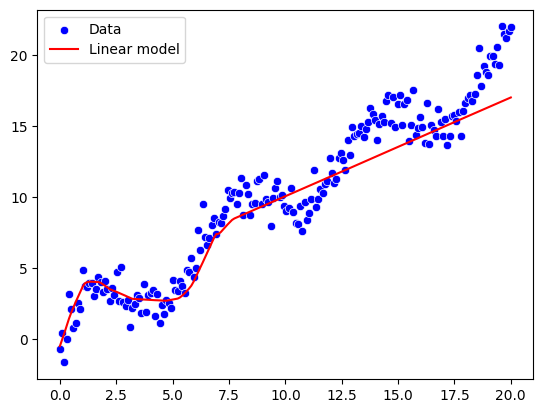

In [19]:
sns.scatterplot(x=X,y=y , color='blue',label='Data')
sns.lineplot(x=X,y=y_pred_m2.ravel(),color='red',label='Linear model')
